In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import statsmodels.api as sm
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols

In [2]:
# Extracting data from excel spreadsheet
df = pd.read_csv('edited_spreadsheet.csv')

# Print the first 5 countries in the data to have an overview
df.head()

,region_id,country_name,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
0,LCN,Aruba,35563.312500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN
1,SAS,Afghanistan,2057.062256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
2,SSF,Angola,8036.690430,51.8,6.7,4.4,11.50,11.9,13.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ECS,Albania,13724.058590,51.4,4.5,4.8,15.21,9.9,9.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites
4,ECS,Andorra,43711.800780,31.2,8.2,2.6,11.60,35.1,11.3,NaN,...,NaN,52.1,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN


In [3]:
# Find out the number of rows in the excel spreadsheet
print("Data dims : ", df.shape)

Data dims :  (214, 49)


# Cleaning the data + uni-variate analysis

We made use of the two variables, namely total msw and population to predict the null values of food organic waste percentage, recycling percentage, national law and enforcement.

### Food organic waste percentage

#### Cleaning the data for food organic waste percentage

In [4]:
# Extract country, food organic waste, total msw and population
food = pd.DataFrame(df[['country_name', 'composition_food_organic_waste_percent', 'total_msw_total_msw_generated_tons_year', 'population_population_number_of_people']])

# Print the first 5 countries in the data to have an overview
food.head()

,country_name,composition_food_organic_waste_percent,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,Aruba,NaN,8.813202e+04,103187
1,Afghanistan,NaN,5.628525e+06,34656032
2,Angola,51.8,4.213644e+06,25096150
3,Albania,51.4,1.087447e+06,2854191
4,Andorra,31.2,4.300000e+04,82431


In [5]:
# Basic statistics for food organic waste, total msw and population 
food.describe()

,composition_food_organic_waste_percent,total_msw_total_msw_generated_tons_year,population_population_number_of_people
count,173.000000,2.140000e+02,2.140000e+02
mean,41.931289,9.649751e+06,3.400569e+07
std,17.930750,3.608622e+07,1.375015e+08
min,3.100000,3.989486e+03,1.109700e+04
25%,30.000000,2.126926e+05,7.542730e+05
50%,43.600000,1.778189e+06,5.778138e+06
75%,55.000000,5.256087e+06,2.110847e+07
max,87.600000,3.950814e+08,1.400050e+09


In [6]:
# Find out how many null values are there for food organic waste
food.isnull().sum()

country_name                                0
composition_food_organic_waste_percent     41
total_msw_total_msw_generated_tons_year     0
population_population_number_of_people      0
dtype: int64

In [7]:
# Check which rows have null values for food organic waste
test_food_data = food[food['composition_food_organic_waste_percent'].isnull()]
test_food_data

,country_name,composition_food_organic_waste_percent,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,Aruba,NaN,8.813202e+04,103187
1,Afghanistan,NaN,5.628525e+06,34656032
21,Bosnia and Herzegovina,NaN,1.248718e+06,3535961
31,Central African Republic,NaN,1.105983e+06,4515392
34,Channel Islands,NaN,1.789330e+05,164541
37,Côte d’Ivoire,NaN,4.440814e+06,20401332
39,"Congo, Dem. Rep.",NaN,1.438523e+07,78736152
40,"Congo, Rep.",NaN,4.512000e+05,2648507
43,Cabo Verde,NaN,1.325550e+05,513979
46,Curacao,NaN,2.470381e+04,153822


In [8]:
# Drop the rows with null values temporarily to be used during prediction 
food.dropna(inplace=True)
food

,country_name,composition_food_organic_waste_percent,total_msw_total_msw_generated_tons_year,population_population_number_of_people
2,Angola,51.800000,4.213644e+06,25096150
3,Albania,51.400000,1.087447e+06,2854191
4,Andorra,31.200000,4.300000e+04,82431
5,United Arab Emirates,39.000000,5.617682e+06,9770529
6,Argentina,38.740000,1.791055e+07,42981516
...,...,...,...,...
208,Samoa,42.600000,2.739909e+04,187665
209,Kosovo,42.000000,3.190000e+05,1801800
210,"Yemen, Rep.",65.000000,4.836820e+06,27584212
211,South Africa,16.381655,1.845723e+07,51729344


In [9]:
# Dropping the entire column for food organic waste and country temporarily to be used during prediciton (non-null values) 
x_train = food.drop('composition_food_organic_waste_percent', axis=1)
x_train = x_train.drop('country_name', axis=1)
x_train

,total_msw_total_msw_generated_tons_year,population_population_number_of_people
2,4.213644e+06,25096150
3,1.087447e+06,2854191
4,4.300000e+04,82431
5,5.617682e+06,9770529
6,1.791055e+07,42981516
...,...,...
208,2.739909e+04,187665
209,3.190000e+05,1801800
210,4.836820e+06,27584212
211,1.845723e+07,51729344


In [10]:
# Entire column of food organic waste (non-null values)
y_train = food['composition_food_organic_waste_percent']
y_train

2      51.800000
3      51.400000
4      31.200000
5      39.000000
6      38.740000
         ...    
208    42.600000
209    42.000000
210    65.000000
211    16.381655
213    36.000000
Name: composition_food_organic_waste_percent, Length: 173, dtype: float64

In [11]:
# Apply linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)

# Dropping the entire column temporarily for country and food organic waste (null values) 
x_test = test_food_data[['total_msw_total_msw_generated_tons_year', 'population_population_number_of_people']]
x_test

,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,8.813202e+04,103187
1,5.628525e+06,34656032
21,1.248718e+06,3535961
31,1.105983e+06,4515392
34,1.789330e+05,164541
37,4.440814e+06,20401332
39,1.438523e+07,78736152
40,4.512000e+05,2648507
43,1.325550e+05,513979
46,2.470381e+04,153822


In [12]:
# Predicting null values for food organic waste
y_pred = lr.predict(x_test)
y_pred

array([ 41.56654727,  43.68141007,  41.59748735,  41.74546417,
        41.54652823,  42.48651747,  45.88354354,  41.73557005,
        41.59798784,  41.59065586,  41.62829328,  41.85235493,
        41.56862933,  41.62895414,  41.68797062,  41.65525734,
        41.57515394, 132.33872991,  41.89941798,  41.7959195 ,
        41.77254584,  41.58005956,  41.57183639,  43.17043758,
        45.19951734,  42.99530528,  41.6747978 ,  50.19270821,
        41.7536694 ,  41.76621836,  41.58419395,  41.99113489,
        42.44871912,  42.00450979,  41.59445152,  41.49834991,
        41.66262505,  41.94197741,  44.17237147,  41.94683762,
        42.36009665])

In [13]:
# Inserting predicted food organic waste values back into the table
test_food_data['composition_food_organic_waste_percent'] = y_pred 
test_food_data

C:\Users\leexu\AppData\Local\Temp\ipykernel_20028\1893030245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_food_data['composition_food_organic_waste_percent'] = y_pred


,country_name,composition_food_organic_waste_percent,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,Aruba,41.566547,8.813202e+04,103187
1,Afghanistan,43.681410,5.628525e+06,34656032
21,Bosnia and Herzegovina,41.597487,1.248718e+06,3535961
31,Central African Republic,41.745464,1.105983e+06,4515392
34,Channel Islands,41.546528,1.789330e+05,164541
37,Côte d’Ivoire,42.486517,4.440814e+06,20401332
39,"Congo, Dem. Rep.",45.883544,1.438523e+07,78736152
40,"Congo, Rep.",41.735570,4.512000e+05,2648507
43,Cabo Verde,41.597988,1.325550e+05,513979
46,Curacao,41.590656,2.470381e+04,153822


In [14]:
# Dropping the row whereby food organic waste exceeds 100% which is invalid and considered an anomaly 
test_food_data = test_food_data.drop(test_food_data[test_food_data['composition_food_organic_waste_percent'] > 100].index)
test_food_data

,country_name,composition_food_organic_waste_percent,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,Aruba,41.566547,8.813202e+04,103187
1,Afghanistan,43.681410,5.628525e+06,34656032
21,Bosnia and Herzegovina,41.597487,1.248718e+06,3535961
31,Central African Republic,41.745464,1.105983e+06,4515392
34,Channel Islands,41.546528,1.789330e+05,164541
37,Côte d’Ivoire,42.486517,4.440814e+06,20401332
39,"Congo, Dem. Rep.",45.883544,1.438523e+07,78736152
40,"Congo, Rep.",41.735570,4.512000e+05,2648507
43,Cabo Verde,41.597988,1.325550e+05,513979
46,Curacao,41.590656,2.470381e+04,153822


In [15]:
# Merging the two tables together (previously null and non-null values) 
updated_food = pd.merge(food, test_food_data, how='outer')
updated_food

,country_name,composition_food_organic_waste_percent,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,Angola,51.800000,4.213644e+06,25096150
1,Albania,51.400000,1.087447e+06,2854191
2,Andorra,31.200000,4.300000e+04,82431
3,United Arab Emirates,39.000000,5.617682e+06,9770529
4,Argentina,38.740000,1.791055e+07,42981516
...,...,...,...,...
208,Eswatini,41.662625,2.181995e+05,1343098
209,Tajikistan,41.941977,1.787400e+06,8177809
210,Tanzania,44.172371,9.276995e+06,49082996
211,"Venezuela, RB",41.946838,9.779093e+06,29893080


#### Uni-variate analysis for food organic waste percentage

In [16]:
# Basic statistics for updated food organic waste, total msw and population 
updated_food.describe()

,composition_food_organic_waste_percent,total_msw_total_msw_generated_tons_year,population_population_number_of_people
count,213.000000,2.130000e+02,2.130000e+02
mean,42.008071,8.804210e+06,2.781502e+07
std,16.166445,3.397998e+07,1.037099e+08
min,3.100000,3.989486e+03,1.109700e+04
25%,32.000000,2.115058e+05,7.465560e+05
50%,41.899418,1.768977e+06,5.737723e+06
75%,52.000000,5.219716e+06,2.082489e+07
max,87.600000,3.950814e+08,1.400050e+09


<Axes: >

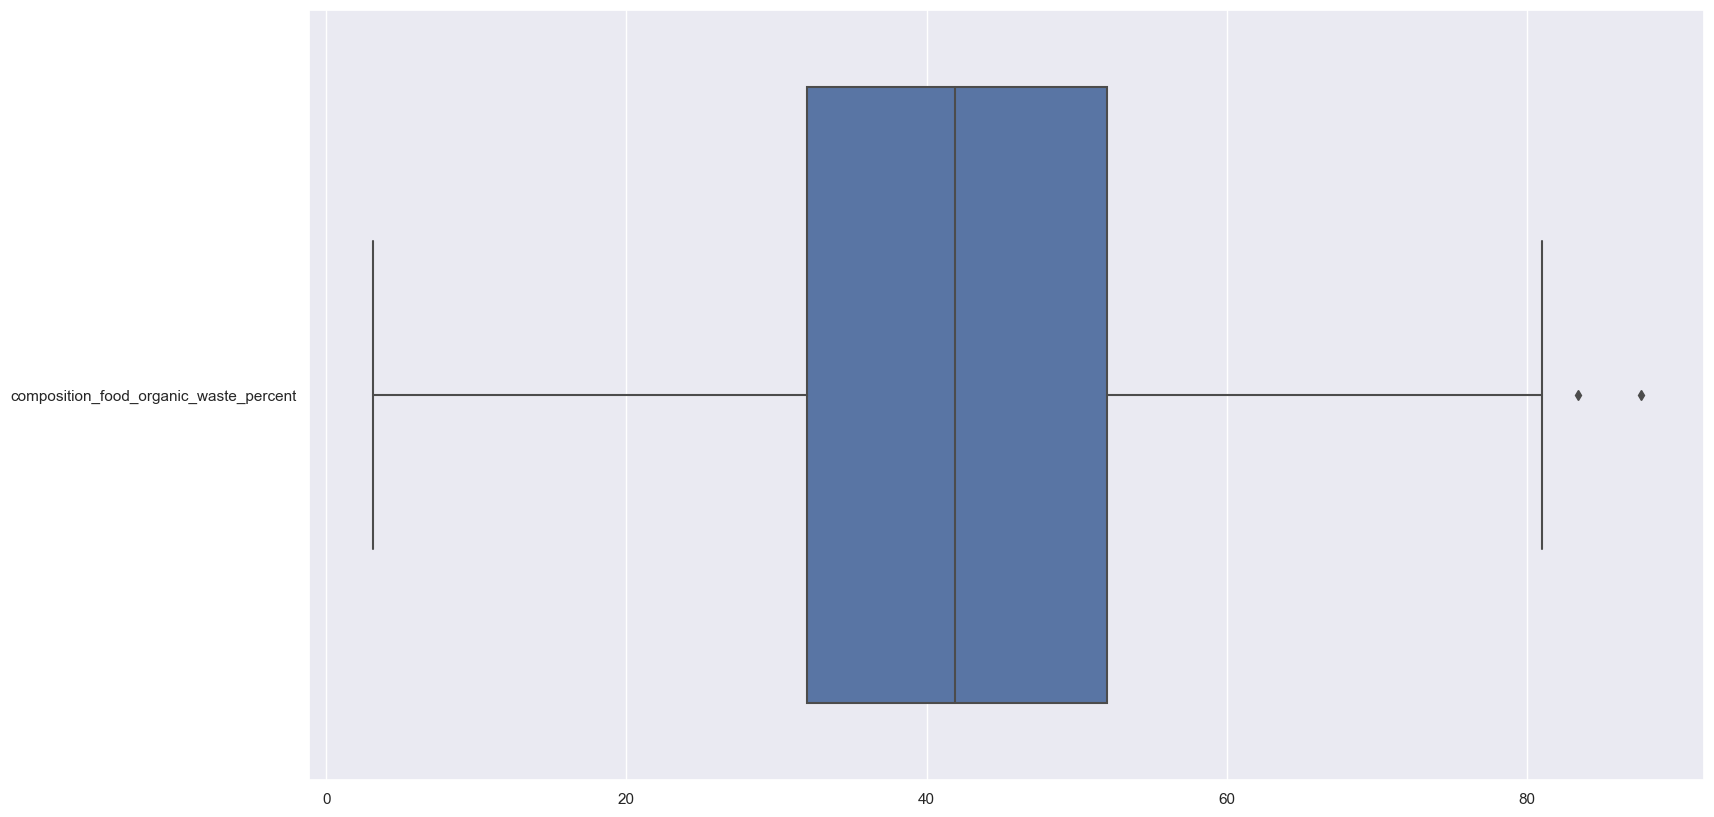

In [17]:
# Box-plot for updated food organic waste
food_organicwaste = pd.DataFrame(updated_food['composition_food_organic_waste_percent'])
f = plt.figure(figsize=(18, 10))
sb.boxplot(data = food_organicwaste, orient = "h")

<Axes: ylabel='Count'>

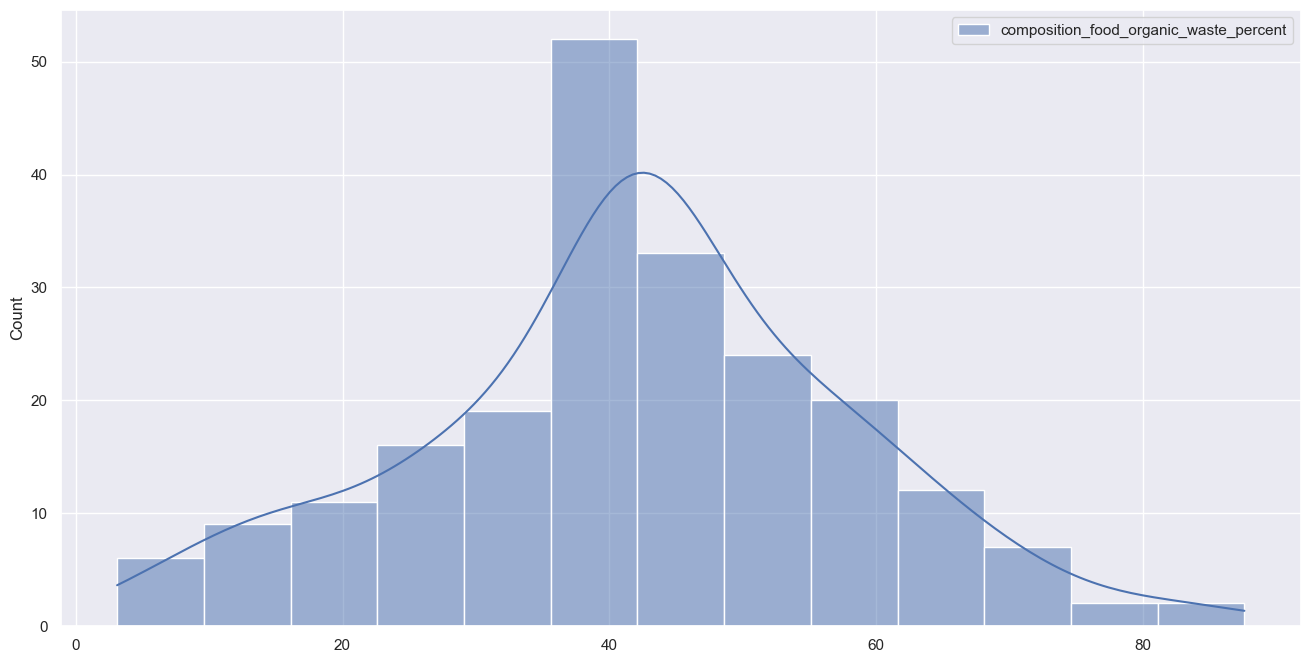

In [18]:
# Density plot for updated food organic waste
f = plt.figure(figsize=(16, 8))
sb.histplot(data = food_organicwaste, kde = True)

<Axes: >

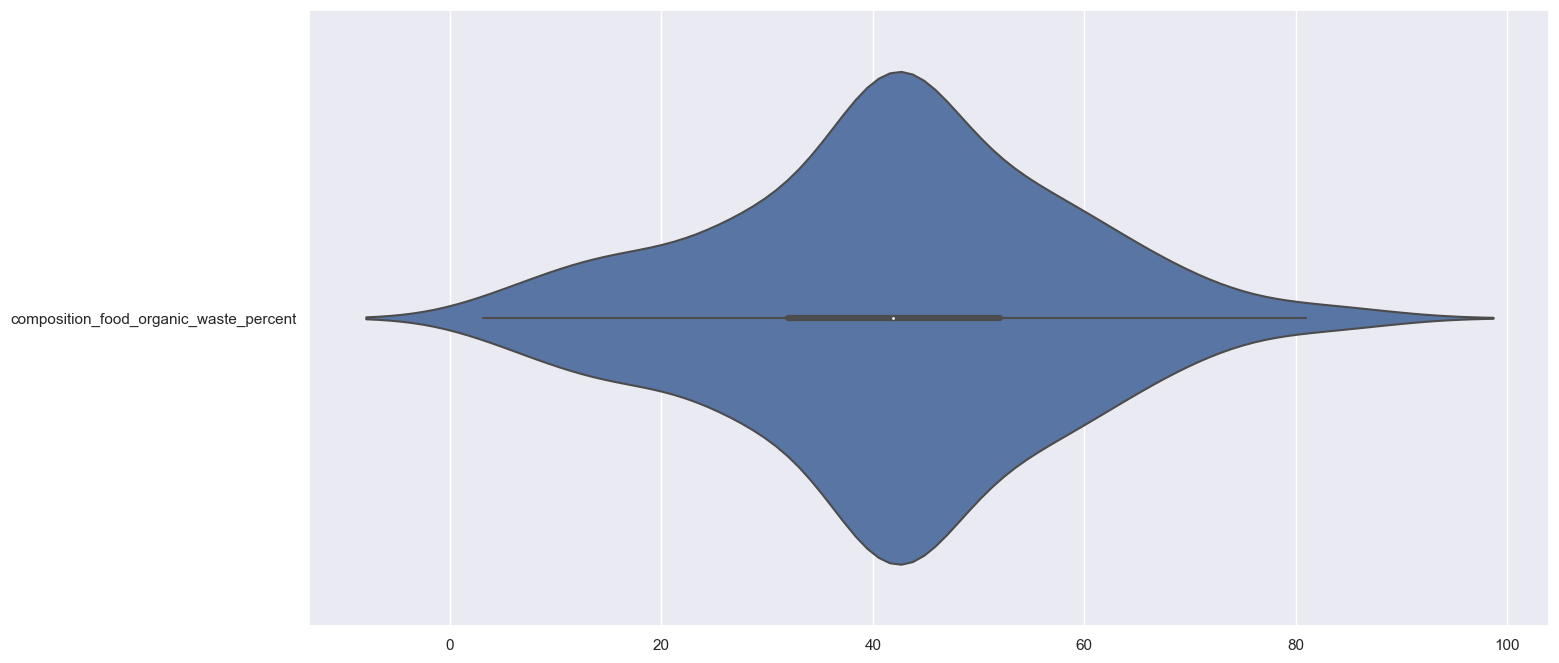

In [19]:
# Violin plot for updated food organic waste
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = food_organicwaste, orient = "h")

### Recycling percentage

#### Cleaning the data for recycling percentage

In [20]:
# Extract country, recycling percentage, total msw and population
recycle = pd.DataFrame(df[['country_name', 'waste_treatment_recycling_percent', 'total_msw_total_msw_generated_tons_year', 'population_population_number_of_people']])

# Dropping the row with India as it was previously removed for food organic waste 
recycle = recycle.drop(recycle[recycle['country_name'] == 'India'].index)

# Print the first 5 countries in the data to have an overview
recycle.head()

,country_name,waste_treatment_recycling_percent,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,Aruba,11.0,8.813202e+04,103187
1,Afghanistan,NaN,5.628525e+06,34656032
2,Angola,NaN,4.213644e+06,25096150
3,Albania,NaN,1.087447e+06,2854191
4,Andorra,NaN,4.300000e+04,82431


In [21]:
# Basic statistics for recycling percentage, total msw and population 
recycle.describe()

,waste_treatment_recycling_percent,total_msw_total_msw_generated_tons_year,population_population_number_of_people
count,123.000000,2.130000e+02,2.130000e+02
mean,17.472148,8.804210e+06,2.781502e+07
std,15.248493,3.397998e+07,1.037099e+08
min,0.000970,3.989486e+03,1.109700e+04
25%,5.200000,2.115058e+05,7.465560e+05
50%,14.000000,1.768977e+06,5.737723e+06
75%,26.050000,5.219716e+06,2.082489e+07
max,67.000000,3.950814e+08,1.400050e+09


In [22]:
# Find out how many null values are there for recycling percentage
recycle.isnull().sum()

country_name                                0
waste_treatment_recycling_percent          90
total_msw_total_msw_generated_tons_year     0
population_population_number_of_people      0
dtype: int64

In [23]:
# Check which rows have null values for recycling percentage 
test_recycle_data = recycle[recycle['waste_treatment_recycling_percent'].isnull()]
test_recycle_data

,country_name,waste_treatment_recycling_percent,total_msw_total_msw_generated_tons_year,population_population_number_of_people
1,Afghanistan,NaN,5628525.370,34656032
2,Angola,NaN,4213643.585,25096150
3,Albania,NaN,1087446.750,2854191
4,Andorra,NaN,43000.000,82431
7,Armenia,NaN,492800.000,2906220
...,...,...,...,...
203,"Venezuela, RB",NaN,9779093.140,29893080
204,British Virgin Islands,NaN,21099.190,20645
205,Virgin Islands (U.S.),NaN,146500.000,105784
209,Kosovo,NaN,319000.000,1801800


In [24]:
# Drop the rows with null values temporarily to be used during prediction 
recycle.dropna(inplace=True)
recycle

,country_name,waste_treatment_recycling_percent,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,Aruba,11.00,8.813202e+04,103187
5,United Arab Emirates,20.00,5.617682e+06,9770529
6,Argentina,6.00,1.791055e+07,42981516
10,Australia,42.10,1.334500e+07,23789338
11,Austria,25.66,5.219716e+06,8877067
...,...,...,...,...
207,Vanuatu,37.00,7.022549e+04,270402
208,Samoa,36.00,2.739909e+04,187665
210,"Yemen, Rep.",8.00,4.836820e+06,27584212
211,South Africa,28.00,1.845723e+07,51729344


In [25]:
# Dropping the entire column for recycling percentage and country temporarily to be used during prediction (non-null values) 
x_train = recycle.drop('waste_treatment_recycling_percent', axis=1)
x_train = x_train.drop('country_name', axis = 1)
x_train

,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,8.813202e+04,103187
5,5.617682e+06,9770529
6,1.791055e+07,42981516
10,1.334500e+07,23789338
11,5.219716e+06,8877067
...,...,...
207,7.022549e+04,270402
208,2.739909e+04,187665
210,4.836820e+06,27584212
211,1.845723e+07,51729344


In [26]:
# Entire column of recycling percentage (non-null values)
y_train = recycle['waste_treatment_recycling_percent']
y_train

0      11.00
5      20.00
6       6.00
10     42.10
11     25.66
       ...  
207    37.00
208    36.00
210     8.00
211    28.00
213    16.00
Name: waste_treatment_recycling_percent, Length: 123, dtype: float64

In [27]:
# Apply linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)

# Dropping the entire column temporarily for country and recycling percentage (null values) 
x_test = test_recycle_data[['total_msw_total_msw_generated_tons_year', 'population_population_number_of_people']]
x_test

,total_msw_total_msw_generated_tons_year,population_population_number_of_people
1,5628525.370,34656032
2,4213643.585,25096150
3,1087446.750,2854191
4,43000.000,82431
7,492800.000,2906220
...,...,...
203,9779093.140,29893080
204,21099.190,20645
205,146500.000,105784
209,319000.000,1801800


In [28]:
# Predicting null values for recycling percentage 
y_pred = lr.predict(x_test)
y_pred

array([ 15.43825958,  16.32966257,  18.44274984,  18.55129583,
        18.29552768,  18.54906127,  18.5465219 ,  18.00702399,
        18.12972809,   2.07650647,  18.56449853,  18.52959402,
        18.54855105,  18.23412208, -67.58954238,  18.47352809,
        18.51712742,  18.48319804,  18.54553287,  18.14975464,
         7.28948272,  18.54440121,  18.46870911,  18.26416165,
        16.6257655 ,  18.55139805,  18.42927485,  18.39310439,
        18.44197949,  18.5451579 ,  18.55622345,  17.11930314,
        17.89421344,  17.70674971,  17.02651097,  18.43081633,
        18.05101288,  16.85098746,  18.54547742,  18.5525154 ,
        18.58090023,  18.23467063,  18.26514079,  18.54732511,
        18.31701567,  18.55139113,  16.25035978,  18.54922835,
        16.95714562,  13.74659813,  18.84895526,  18.49321786,
        16.73284114,  18.54161942,   5.28038568,  18.17732846,
        15.25347578,  18.55149241,  18.75478221,  18.45386641,
        18.3907255 ,  18.55117301,  18.13021611,  18.06

In [29]:
# Inserting predicted recycling percentage values back into the table 
test_recycle_data['waste_treatment_recycling_percent'] = y_pred 
test_recycle_data

C:\Users\leexu\AppData\Local\Temp\ipykernel_20028\2358772469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_recycle_data['waste_treatment_recycling_percent'] = y_pred


,country_name,waste_treatment_recycling_percent,total_msw_total_msw_generated_tons_year,population_population_number_of_people
1,Afghanistan,15.438260,5628525.370,34656032
2,Angola,16.329663,4213643.585,25096150
3,Albania,18.442750,1087446.750,2854191
4,Andorra,18.551296,43000.000,82431
7,Armenia,18.295528,492800.000,2906220
...,...,...,...,...
203,"Venezuela, RB",17.030021,9779093.140,29893080
204,British Virgin Islands,18.554042,21099.190,20645
205,Virgin Islands (U.S.),18.572765,146500.000,105784
209,Kosovo,18.396064,319000.000,1801800


In [30]:
# Obtain the row with invalid recycling percentage
invalid_row = test_recycle_data.loc[test_recycle_data['waste_treatment_recycling_percent'] < 0]

# Determine the country with invalid recycling percentage
invalid_country_name = invalid_row['country_name'].tolist()
if len(invalid_country_name) > 0:
    print(f"The following country has an invalid recycling percentage: {', '.join(invalid_country_name)}")

# Drop the row with invalid recycling percentage 
test_recycle_data = test_recycle_data.drop(invalid_row.index)
test_recycle_data

The following country has an invalid recycling percentage: China


,country_name,waste_treatment_recycling_percent,total_msw_total_msw_generated_tons_year,population_population_number_of_people
1,Afghanistan,15.438260,5628525.370,34656032
2,Angola,16.329663,4213643.585,25096150
3,Albania,18.442750,1087446.750,2854191
4,Andorra,18.551296,43000.000,82431
7,Armenia,18.295528,492800.000,2906220
...,...,...,...,...
203,"Venezuela, RB",17.030021,9779093.140,29893080
204,British Virgin Islands,18.554042,21099.190,20645
205,Virgin Islands (U.S.),18.572765,146500.000,105784
209,Kosovo,18.396064,319000.000,1801800


In [31]:
# Merging the two tables together (previously null and non-null values) 
updated_recycle = pd.merge(recycle, test_recycle_data, how='outer')
updated_recycle

,country_name,waste_treatment_recycling_percent,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,Aruba,11.000000,8.813202e+04,103187
1,United Arab Emirates,20.000000,5.617682e+06,9770529
2,Argentina,6.000000,1.791055e+07,42981516
3,Australia,42.100000,1.334500e+07,23789338
4,Austria,25.660000,5.219716e+06,8877067
...,...,...,...,...
207,"Venezuela, RB",17.030021,9.779093e+06,29893080
208,British Virgin Islands,18.554042,2.109919e+04,20645
209,Virgin Islands (U.S.),18.572765,1.465000e+05,105784
210,Kosovo,18.396064,3.190000e+05,1801800


#### Uni-variate analysis for recycling percentage

In [32]:
# Basic statistics for updated recycling percentage, total msw and population 
updated_recycle.describe()

,waste_treatment_recycling_percent,total_msw_total_msw_generated_tons_year,population_population_number_of_people
count,212.000000,2.120000e+02,2.120000e+02
mean,17.465378,6.982148e+06,2.134222e+07
std,11.717100,2.120423e+07,4.289900e+07
min,0.000970,3.989486e+03,1.109700e+04
25%,8.150000,2.113429e+05,7.464722e+05
50%,18.129972,1.759489e+06,5.720662e+06
75%,18.574799,4.988073e+06,2.050722e+07
max,67.000000,2.652245e+08,3.266875e+08


<Axes: >

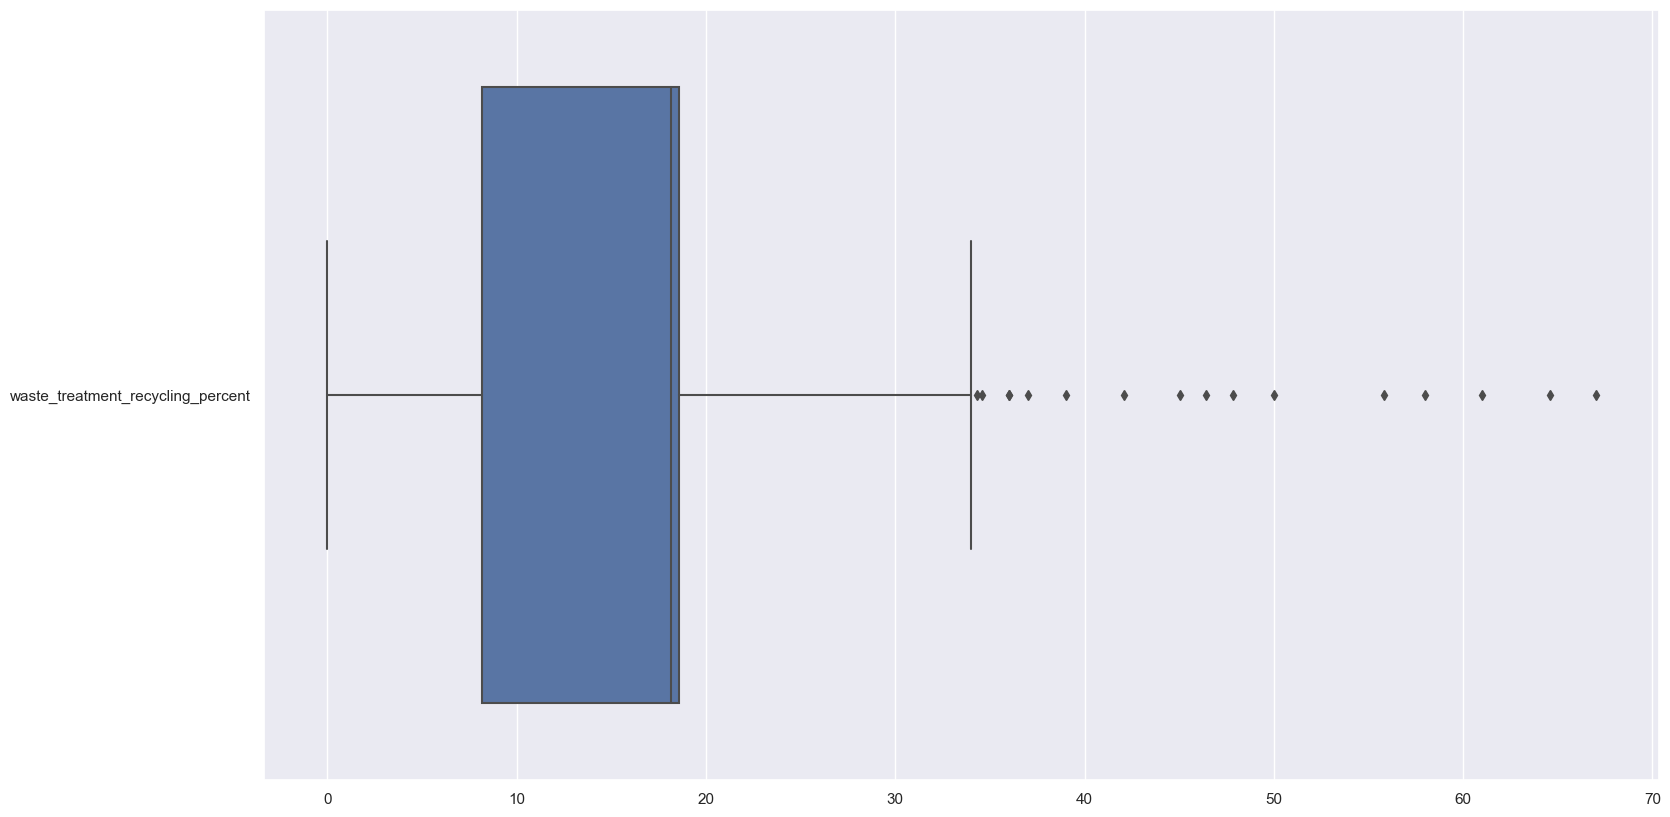

In [33]:
# Box-plot for updated recycling percentage
recycle_wastetreatment = pd.DataFrame(updated_recycle['waste_treatment_recycling_percent'])
f = plt.figure(figsize=(18, 10))
sb.boxplot(data = recycle_wastetreatment, orient = "h")

<Axes: ylabel='Count'>

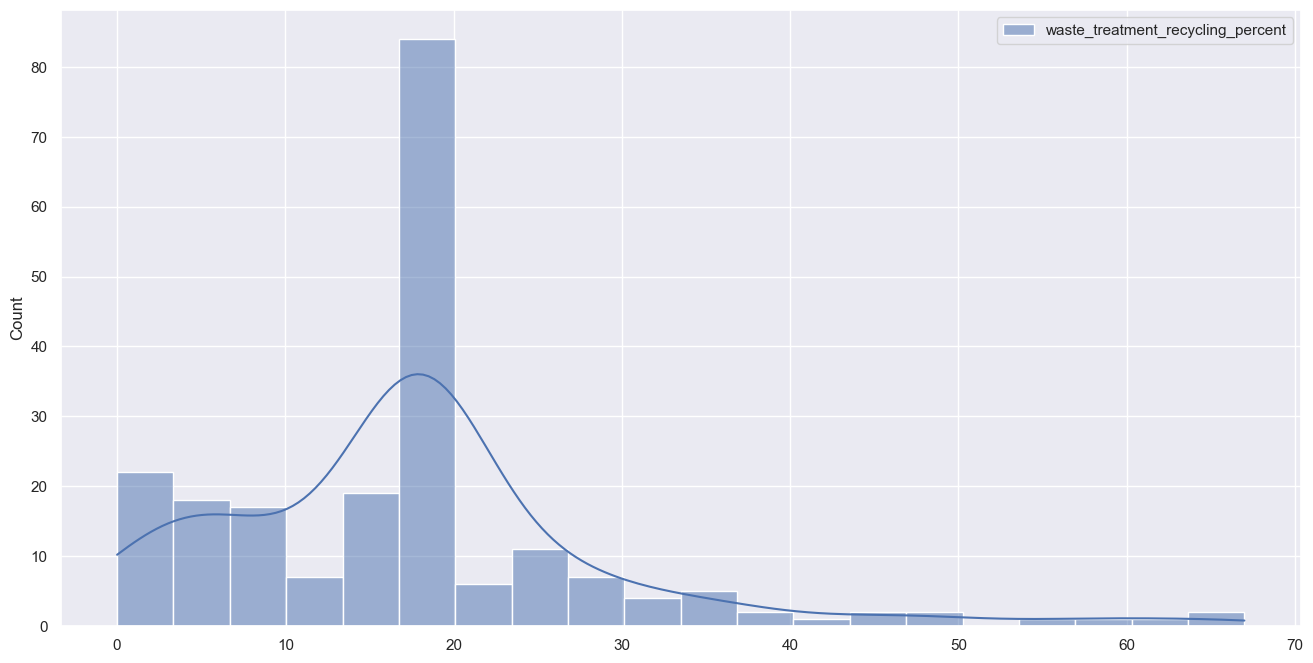

In [34]:
# Density plot for updated recycling percentage
f = plt.figure(figsize=(16, 8))
sb.histplot(data = recycle_wastetreatment, kde = True)

<Axes: >

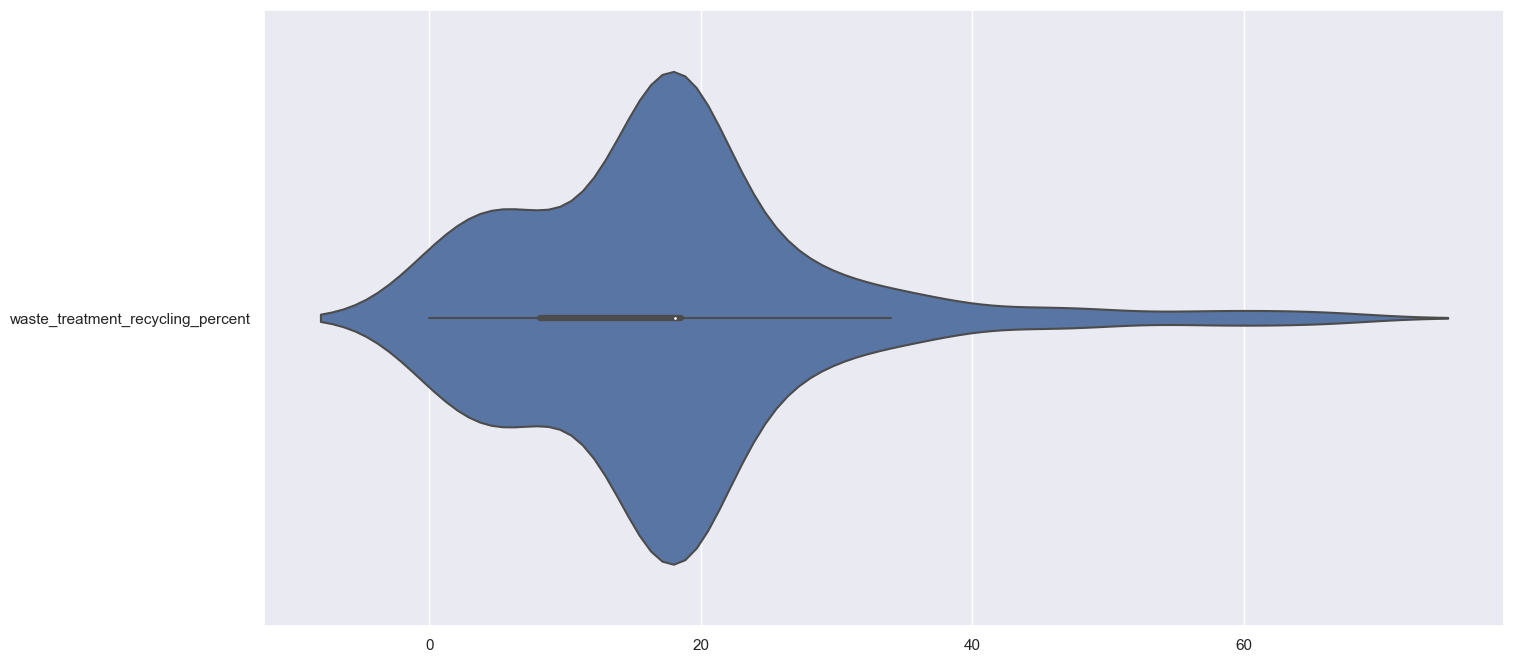

In [35]:
# Violin plot for updated recycling percentage
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = recycle_wastetreatment, orient = "h")

### National law

#### Cleaning the data for national law

In [36]:
# Finding the frequency of yes and no for national law
national_law_mode = pd.DataFrame(df[['country_name','other_information_national_law_governing_solid_waste_management_in_the_country']])

# Dropping the row with India and China as it was previously removed for food organic waste and recycling percentage 
national_law_mode = national_law_mode.drop(national_law_mode[national_law_mode['country_name'] == 'India'].index)
national_law_mode = national_law_mode.drop(national_law_mode[national_law_mode['country_name'] == 'China'].index)
national_law_mode.describe()

,country_name,other_information_national_law_governing_solid_waste_management_in_the_country
count,212,189
unique,212,2
top,Aruba,Yes
freq,1,172


In [37]:
# Setting the threshold of what's considered yes and what's considered no
national_law_threshold = (172/(189-172))
print(national_law_threshold)

10.117647058823529


Therefore, the threshold to determine whether a variable is yes or no is 10.1

In [38]:
# Extract country, national law, total msw and population
national_law = pd.DataFrame(df[['country_name', 'other_information_national_law_governing_solid_waste_management_in_the_country', 'total_msw_total_msw_generated_tons_year', 'population_population_number_of_people']])

# Dropping the row with India and China as it was previously removed for food organic waste and recycling percentage 
national_law = national_law.drop(national_law[national_law['country_name'] == 'India'].index)
national_law = national_law.drop(national_law[national_law['country_name'] == 'China'].index)
national_law

,country_name,other_information_national_law_governing_solid_waste_management_in_the_country,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,Aruba,Yes,8.813202e+04,103187
1,Afghanistan,Yes,5.628525e+06,34656032
2,Angola,Yes,4.213644e+06,25096150
3,Albania,Yes,1.087447e+06,2854191
4,Andorra,Yes,4.300000e+04,82431
...,...,...,...,...
209,Kosovo,Yes,3.190000e+05,1801800
210,"Yemen, Rep.",Yes,4.836820e+06,27584212
211,South Africa,Yes,1.845723e+07,51729344
212,Zambia,Yes,2.608268e+06,14264756


In [39]:
# Converting yes and no to 1 and 0 respectively for future prediction 
national_law.other_information_national_law_governing_solid_waste_management_in_the_country[national_law.other_information_national_law_governing_solid_waste_management_in_the_country == 'Yes'] = 1
national_law.other_information_national_law_governing_solid_waste_management_in_the_country[national_law.other_information_national_law_governing_solid_waste_management_in_the_country == 'No'] = 0
national_law

C:\Users\leexu\AppData\Local\Temp\ipykernel_20028\1169959369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  national_law.other_information_national_law_governing_solid_waste_management_in_the_country[national_law.other_information_national_law_governing_solid_waste_management_in_the_country == 'Yes'] = 1
C:\Users\leexu\AppData\Local\Temp\ipykernel_20028\1169959369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  national_law.other_information_national_law_governing_solid_waste_management_in_the_country[national_law.other_information_national_law_governing_solid_waste_management_in_the_country == 'No'] = 0


,country_name,other_information_national_law_governing_solid_waste_management_in_the_country,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,Aruba,1,8.813202e+04,103187
1,Afghanistan,1,5.628525e+06,34656032
2,Angola,1,4.213644e+06,25096150
3,Albania,1,1.087447e+06,2854191
4,Andorra,1,4.300000e+04,82431
...,...,...,...,...
209,Kosovo,1,3.190000e+05,1801800
210,"Yemen, Rep.",1,4.836820e+06,27584212
211,South Africa,1,1.845723e+07,51729344
212,Zambia,1,2.608268e+06,14264756


In [40]:
# Find out how many null values are there for national law 
national_law.isnull().sum()

country_name                                                                       0
other_information_national_law_governing_solid_waste_management_in_the_country    23
total_msw_total_msw_generated_tons_year                                            0
population_population_number_of_people                                             0
dtype: int64

In [41]:
# Check which rows have null values for national law 
test_national_law = national_law[national_law['other_information_national_law_governing_solid_waste_management_in_the_country'].isnull()]
test_national_law

,country_name,other_information_national_law_governing_solid_waste_management_in_the_country,total_msw_total_msw_generated_tons_year,population_population_number_of_people
5,United Arab Emirates,NaN,5.617682e+06,9770529
8,American Samoa,NaN,1.898949e+04,55599
13,Burundi,NaN,1.872016e+06,6741569
30,Botswana,NaN,2.108544e+05,2014866
51,Djibouti,NaN,1.149972e+05,746221
58,Eritrea,NaN,7.269574e+05,4474690
67,Gabon,NaN,2.381023e+05,1086137
74,Guinea-Bissau,NaN,2.895140e+05,1770526
75,Equatorial Guinea,NaN,1.984431e+05,1221490
114,Lesotho,NaN,7.345700e+04,1965662


In [42]:
# Drop the rows with null values temporarily to be used during prediction 
national_law.dropna(inplace=True)
national_law

,country_name,other_information_national_law_governing_solid_waste_management_in_the_country,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,Aruba,1,8.813202e+04,103187
1,Afghanistan,1,5.628525e+06,34656032
2,Angola,1,4.213644e+06,25096150
3,Albania,1,1.087447e+06,2854191
4,Andorra,1,4.300000e+04,82431
...,...,...,...,...
209,Kosovo,1,3.190000e+05,1801800
210,"Yemen, Rep.",1,4.836820e+06,27584212
211,South Africa,1,1.845723e+07,51729344
212,Zambia,1,2.608268e+06,14264756


In [43]:
# Dropping the entire column for country and national law temporarily to be used during prediction (non-null values) 
x_train = national_law.drop('other_information_national_law_governing_solid_waste_management_in_the_country', axis=1)
x_train = x_train.drop('country_name', axis=1)
x_train

,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,8.813202e+04,103187
1,5.628525e+06,34656032
2,4.213644e+06,25096150
3,1.087447e+06,2854191
4,4.300000e+04,82431
...,...,...
209,3.190000e+05,1801800
210,4.836820e+06,27584212
211,1.845723e+07,51729344
212,2.608268e+06,14264756


In [44]:
# Entire column of national law (non-null values)
y_train = national_law['other_information_national_law_governing_solid_waste_management_in_the_country']
y_train

0      1
1      1
2      1
3      1
4      1
      ..
209    1
210    1
211    1
212    1
213    1
Name: other_information_national_law_governing_solid_waste_management_in_the_country, Length: 189, dtype: object

In [45]:
# Apply linear regression 
lr = LinearRegression()
lr.fit(x_train, y_train)

# Dropping the entire column for country and national law temporarily (null values) 
x_test = test_national_law[['total_msw_total_msw_generated_tons_year', 'population_population_number_of_people']]
x_test

,total_msw_total_msw_generated_tons_year,population_population_number_of_people
5,5.617682e+06,9770529
8,1.898949e+04,55599
13,1.872016e+06,6741569
30,2.108544e+05,2014866
51,1.149972e+05,746221
58,7.269574e+05,4474690
67,2.381023e+05,1086137
74,2.895140e+05,1770526
75,1.984431e+05,1221490
114,7.345700e+04,1965662


In [46]:
# Predicting null values for national law
y_pred = lr.predict(x_test)
y_pred

array([0.91791585, 0.9165048 , 0.91394896, 0.91513661, 0.91607257,
       0.91390421, 0.91599359, 0.91548814, 0.91580576, 0.91493718,
       0.90599427, 0.90436968, 0.91561371, 0.91387206, 0.88785023,
       0.91285784, 0.91652111, 0.90815062, 0.91151127, 0.91639827,
       0.91573468, 0.90856219, 0.89837645])

In [47]:
# Analysing the predicted values to determine which is yes and which is no 
arr = np.array([0.91791585, 0.9165048 , 0.91394896, 0.91513661, 0.91607257,
       0.91390421, 0.91599359, 0.91548814, 0.91580576, 0.91493718,
       0.90599427, 0.90436968, 0.91561371, 0.91387206, 0.88785023,
       0.91285784, 0.91652111, 0.90815062, 0.91151127, 0.91639827,
       0.91573468, 0.90856219, 0.89837645])

# Create an empty list
filter_arr = []

# Go through each element in arr
for element in arr:
  # If the element (y/1-y) is higher than y+/y-, set the value to 1, otherwise 0
  if (element/(1-element)) > 10.1:
    filter_arr.append(1)
  else:
    filter_arr.append(0)

newarr = arr[filter_arr]

# Converting the predicted values into 1 and 0 
print(filter_arr)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0]


In [48]:
# Inserting predicted national law values back into the table 
test_national_law['other_information_national_law_governing_solid_waste_management_in_the_country'] = filter_arr 
test_national_law

C:\Users\leexu\AppData\Local\Temp\ipykernel_20028\4022653040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_national_law['other_information_national_law_governing_solid_waste_management_in_the_country'] = filter_arr


,country_name,other_information_national_law_governing_solid_waste_management_in_the_country,total_msw_total_msw_generated_tons_year,population_population_number_of_people
5,United Arab Emirates,1,5.617682e+06,9770529
8,American Samoa,1,1.898949e+04,55599
13,Burundi,1,1.872016e+06,6741569
30,Botswana,1,2.108544e+05,2014866
51,Djibouti,1,1.149972e+05,746221
58,Eritrea,1,7.269574e+05,4474690
67,Gabon,1,2.381023e+05,1086137
74,Guinea-Bissau,1,2.895140e+05,1770526
75,Equatorial Guinea,1,1.984431e+05,1221490
114,Lesotho,1,7.345700e+04,1965662


In [49]:
# Merging the two tables together (previously null and non-null values) 
updated_national_law = pd.merge(national_law, test_national_law, how='outer')
updated_national_law

C:\Users\leexu\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


,country_name,other_information_national_law_governing_solid_waste_management_in_the_country,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,Aruba,1.0,8.813202e+04,103187
1,Afghanistan,1.0,5.628525e+06,34656032
2,Angola,1.0,4.213644e+06,25096150
3,Albania,1.0,1.087447e+06,2854191
4,Andorra,1.0,4.300000e+04,82431
...,...,...,...,...
207,South Sudan,1.0,2.680681e+06,11177490
208,São Tomé and Príncipe,1.0,2.558650e+04,191266
209,Eswatini,1.0,2.181995e+05,1343098
210,Chad,0.0,1.358851e+06,11887202


In [50]:
# Converting 1 and 0 back to yes and no respectively
final_national_law = updated_national_law[['country_name', 'other_information_national_law_governing_solid_waste_management_in_the_country']]
final_national_law.other_information_national_law_governing_solid_waste_management_in_the_country[final_national_law.other_information_national_law_governing_solid_waste_management_in_the_country == 1] = 'Yes'
final_national_law.other_information_national_law_governing_solid_waste_management_in_the_country[final_national_law.other_information_national_law_governing_solid_waste_management_in_the_country == 0] = 'No'
print(final_national_law)

C:\Users\leexu\AppData\Local\Temp\ipykernel_20028\1199937111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_national_law.other_information_national_law_governing_solid_waste_management_in_the_country[final_national_law.other_information_national_law_governing_solid_waste_management_in_the_country == 1] = 'Yes'


              country_name  \
0                    Aruba   
1              Afghanistan   
2                   Angola   
3                  Albania   
4                  Andorra   
..                     ...   
207            South Sudan   
208  São Tomé and Príncipe   
209               Eswatini   
210                   Chad   
211                 Uganda   

    other_information_national_law_governing_solid_waste_management_in_the_country  
0                                                  Yes                              
1                                                  Yes                              
2                                                  Yes                              
3                                                  Yes                              
4                                                  Yes                              
..                                                 ...                              
207                                         

C:\Users\leexu\AppData\Local\Temp\ipykernel_20028\1199937111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_national_law.other_information_national_law_governing_solid_waste_management_in_the_country[final_national_law.other_information_national_law_governing_solid_waste_management_in_the_country == 0] = 'No'


#### Uni-variate analysis for national law

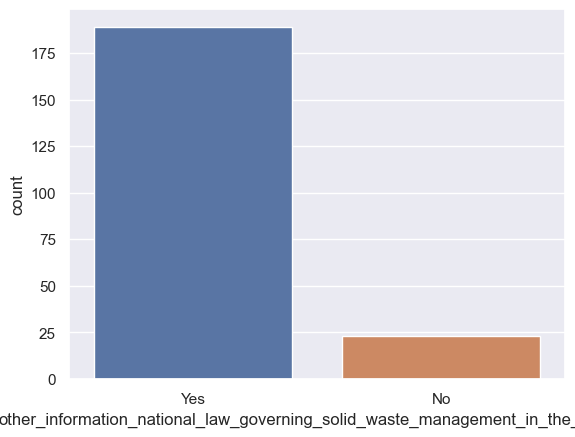

In [51]:
# Count plot for national law
sb.countplot(x = final_national_law['other_information_national_law_governing_solid_waste_management_in_the_country'])
plt.show()

From the bar chart above, it seems as if our data is imbalanced. We hence proceeded to check if there is a relationship between national law and food organic waste.

In [52]:
# Dropping the row with China as it was previously removed for recycling percentage 
updated_food = updated_food.drop(updated_food[updated_food['country_name'] == 'China'].index)

# Merging updated food organic waste with updated national law
food_national_law = pd.merge(updated_food, final_national_law, how='outer')
food_national_law = food_national_law[['composition_food_organic_waste_percent', 'other_information_national_law_governing_solid_waste_management_in_the_country']]
food_national_law

,composition_food_organic_waste_percent,other_information_national_law_governing_solid_waste_management_in_the_country
0,51.800000,Yes
1,51.400000,Yes
2,31.200000,Yes
3,39.000000,Yes
4,38.740000,Yes
...,...,...
207,41.662625,Yes
208,41.941977,Yes
209,44.172371,Yes
210,41.946838,Yes


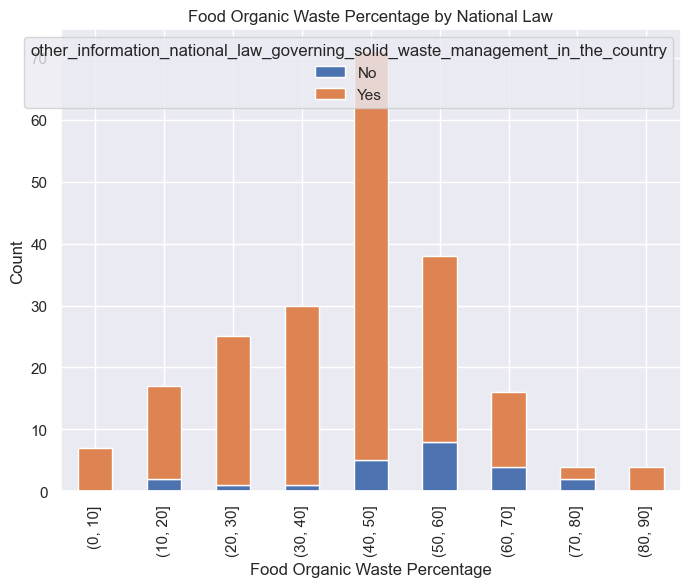

In [53]:
# Create a new column that groups the food organic waste percentage into intervals of 10
food_national_law['organic_waste_group'] = pd.cut(food_national_law['composition_food_organic_waste_percent'], range(0, 91, 10))

# Create a pivot table with the count of food organic waste percentage in each group for each national law value
pivot_table = pd.pivot_table(food_national_law, values='composition_food_organic_waste_percent', index='organic_waste_group', columns='other_information_national_law_governing_solid_waste_management_in_the_country', aggfunc='count')

# Create a stacked bar chart of the pivot table
pivot_table.plot(kind='bar', stacked=True, figsize=(8,6))

# Add labels and titles to the plot
plt.xlabel('Food Organic Waste Percentage')
plt.ylabel('Count')
plt.title('Food Organic Waste Percentage by National Law')
plt.show()

In [54]:
# Setting the threshold of what is considered high waste and what is considered as low waste
threshold = 0.5*100
print("The threshold for high or low waste is set at " + str(threshold))

The threshold for high or low waste is set at 50.0


The maximum possible percentage is 100%. Therefore, we consider all the organic waste percentage <= 50% as low waste and >50% as high waste.

In [55]:
# Counting the number of countries for each category (low/high food organic waste & presence/absence of national law)
low_waste_no_law = food_national_law[(food_national_law['composition_food_organic_waste_percent'] <= 50) & (food_national_law['other_information_national_law_governing_solid_waste_management_in_the_country'] == 'No')].shape[0]
low_waste_law = food_national_law[(food_national_law['composition_food_organic_waste_percent'] <= 50) & (food_national_law['other_information_national_law_governing_solid_waste_management_in_the_country'] == 'Yes')].shape[0]
high_waste_no_law = food_national_law[(food_national_law['composition_food_organic_waste_percent'] > 50) & (food_national_law['other_information_national_law_governing_solid_waste_management_in_the_country'] == 'No')].shape[0]
high_waste_law = food_national_law[(food_national_law['composition_food_organic_waste_percent'] > 50) & (food_national_law['other_information_national_law_governing_solid_waste_management_in_the_country'] == 'Yes')].shape[0]

print('Number of countries with low waste and no law: ' + str(low_waste_no_law))
print('Number of countries with low waste and presence of law: ' + str(low_waste_law))
print('Number of countries with high waste and no law: ' + str(high_waste_no_law))
print('Number of countries with high waste and presence of law: ' + str(high_waste_law))

Number of countries with low waste and no law: 9
Number of countries with low waste and presence of law: 141
Number of countries with high waste and no law: 14
Number of countries with high waste and presence of law: 48


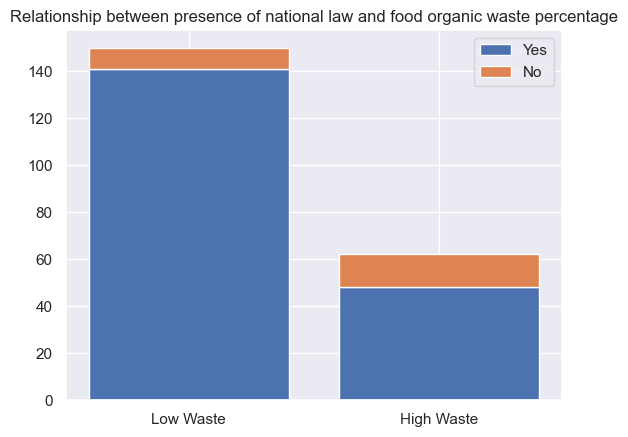

In [56]:
# Plottig a stacked bar chart to check if there is a relationship between the presence of national law and food organic waste percentage
# [low, high]
yes = [141, 48]
no = [9, 14]

fig, ax = plt.subplots()
x = np.arange(len(yes))
ax.bar(x, yes, label='Yes')
ax.bar(x, no, bottom=yes, label='No')
ax.set_xticks(x)
ax.set_xticklabels(['Low Waste', 'High Waste'])
ax.set_title('Relationship between presence of national law and food organic waste percentage')
ax.legend()

From the bar chart above, we can conclude that the presence of national law leads to a lower organic waste percentage. We can hence consider the presence of national law as a contributing factor to the food organic waste levels. 

### Enforcement

In [57]:
# Finding the frequency of yes and no for enforcement
enforcement_mode = pd.DataFrame(df[['country_name','other_information_national_agency_to_enforce_solid_waste_laws_and_regulations']])

# Dropping the row with India and China as it was previously removed for food organic waste and recycling percentage 
enforcement_mode = enforcement_mode.drop(enforcement_mode[enforcement_mode['country_name'] == 'India'].index)
enforcement_mode = enforcement_mode.drop(enforcement_mode[enforcement_mode['country_name'] == 'China'].index)
enforcement_mode.describe()

,country_name,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations
count,212,160
unique,212,2
top,Aruba,Yes
freq,1,145


In [58]:
# Setting the threshold of what's considered yes and what's considered no
enforcement_threshold = (145/(160-145))
print(enforcement_threshold)

9.666666666666666


Therefore, the threshold to determine whether a variable is yes or no is 9.6


In [59]:
# Extract country, enforcement, total msw and population
enforcement = pd.DataFrame(df[['country_name','other_information_national_agency_to_enforce_solid_waste_laws_and_regulations', 'total_msw_total_msw_generated_tons_year', 'population_population_number_of_people']])

# Dropping the row with India and China as it was previously removed for food organic waste and recycling percentage 
enforcement = enforcement.drop(enforcement[enforcement['country_name'] == 'India'].index)
enforcement = enforcement.drop(enforcement[enforcement['country_name'] == 'China'].index)
enforcement

,country_name,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,Aruba,Yes,8.813202e+04,103187
1,Afghanistan,Yes,5.628525e+06,34656032
2,Angola,NaN,4.213644e+06,25096150
3,Albania,Yes,1.087447e+06,2854191
4,Andorra,Yes,4.300000e+04,82431
...,...,...,...,...
209,Kosovo,Yes,3.190000e+05,1801800
210,"Yemen, Rep.",Yes,4.836820e+06,27584212
211,South Africa,Yes,1.845723e+07,51729344
212,Zambia,NaN,2.608268e+06,14264756


In [60]:
# Converting yes and no to 1 and 0 respectively for future prediction 
enforcement.other_information_national_agency_to_enforce_solid_waste_laws_and_regulations [enforcement.other_information_national_agency_to_enforce_solid_waste_laws_and_regulations  == 'Yes'] = 1
enforcement.other_information_national_agency_to_enforce_solid_waste_laws_and_regulations [enforcement.other_information_national_agency_to_enforce_solid_waste_laws_and_regulations  == 'No'] = 0
enforcement

C:\Users\leexu\AppData\Local\Temp\ipykernel_20028\880011328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enforcement.other_information_national_agency_to_enforce_solid_waste_laws_and_regulations [enforcement.other_information_national_agency_to_enforce_solid_waste_laws_and_regulations  == 'Yes'] = 1
C:\Users\leexu\AppData\Local\Temp\ipykernel_20028\880011328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enforcement.other_information_national_agency_to_enforce_solid_waste_laws_and_regulations [enforcement.other_information_national_agency_to_enforce_solid_waste_laws_and_regulations  == 'No'] = 0


,country_name,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,Aruba,1,8.813202e+04,103187
1,Afghanistan,1,5.628525e+06,34656032
2,Angola,NaN,4.213644e+06,25096150
3,Albania,1,1.087447e+06,2854191
4,Andorra,1,4.300000e+04,82431
...,...,...,...,...
209,Kosovo,1,3.190000e+05,1801800
210,"Yemen, Rep.",1,4.836820e+06,27584212
211,South Africa,1,1.845723e+07,51729344
212,Zambia,NaN,2.608268e+06,14264756


In [61]:
# Find out how many null values are there for enforcement 
enforcement.isnull().sum()

country_name                                                                      0
other_information_national_agency_to_enforce_solid_waste_laws_and_regulations    52
total_msw_total_msw_generated_tons_year                                           0
population_population_number_of_people                                            0
dtype: int64

In [62]:
# Check which rows have null values for enforcement
test_enforcement = enforcement[enforcement['other_information_national_agency_to_enforce_solid_waste_laws_and_regulations'].isnull()]
test_enforcement

,country_name,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,total_msw_total_msw_generated_tons_year,population_population_number_of_people
2,Angola,NaN,4.213644e+06,25096150
6,Argentina,NaN,1.791055e+07,42981516
13,Burundi,NaN,1.872016e+06,6741569
15,Benin,NaN,6.859360e+05,5521763
30,Botswana,NaN,2.108544e+05,2014866
31,Central African Republic,NaN,1.105983e+06,4515392
38,Cameroon,NaN,3.270617e+06,21655716
39,"Congo, Dem. Rep.",NaN,1.438523e+07,78736152
41,Colombia,NaN,1.215012e+07,46406648
42,Comoros,NaN,9.101300e+04,777424


In [63]:
# Drop the rows with null values temporarily to be used during prediction 
enforcement.dropna(inplace=True)
enforcement

,country_name,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,Aruba,1,8.813202e+04,103187
1,Afghanistan,1,5.628525e+06,34656032
3,Albania,1,1.087447e+06,2854191
4,Andorra,1,4.300000e+04,82431
5,United Arab Emirates,1,5.617682e+06,9770529
...,...,...,...,...
207,Vanuatu,1,7.022549e+04,270402
208,Samoa,1,2.739909e+04,187665
209,Kosovo,1,3.190000e+05,1801800
210,"Yemen, Rep.",1,4.836820e+06,27584212


In [64]:
# Dropping the entire column for country and enforcement temporarily to be used during prediction (non-null values) 
x_train = enforcement.drop('other_information_national_agency_to_enforce_solid_waste_laws_and_regulations', axis=1)
x_train = x_train.drop('country_name', axis=1)
x_train

,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,8.813202e+04,103187
1,5.628525e+06,34656032
3,1.087447e+06,2854191
4,4.300000e+04,82431
5,5.617682e+06,9770529
...,...,...
207,7.022549e+04,270402
208,2.739909e+04,187665
209,3.190000e+05,1801800
210,4.836820e+06,27584212


In [65]:
# Entire column of enforcement (non-null values)
y_train = enforcement['other_information_national_agency_to_enforce_solid_waste_laws_and_regulations']
y_train

0      1
1      1
3      1
4      1
5      1
      ..
207    1
208    1
209    1
210    1
211    1
Name: other_information_national_agency_to_enforce_solid_waste_laws_and_regulations, Length: 160, dtype: object

In [66]:
# Apply linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)

# Dropping the entire column for country and enforcement temporarily (null values) 
x_test = test_enforcement[['total_msw_total_msw_generated_tons_year', 'population_population_number_of_people']]
x_test

,total_msw_total_msw_generated_tons_year,population_population_number_of_people
2,4.213644e+06,25096150
6,1.791055e+07,42981516
13,1.872016e+06,6741569
15,6.859360e+05,5521763
30,2.108544e+05,2014866
31,1.105983e+06,4515392
38,3.270617e+06,21655716
39,1.438523e+07,78736152
41,1.215012e+07,46406648
42,9.101300e+04,777424


In [67]:
# Predicting null values for enforcement
y_pred = lr.predict(x_test)
y_pred

array([0.90342984, 0.90810185, 0.90581308, 0.90534008, 0.90577847,
       0.90580679, 0.90356768, 0.89850432, 0.90385982, 0.90596245,
       0.90597333, 0.90598363, 0.90558302, 0.90609561, 0.90598836,
       0.90474245, 0.9058775 , 0.9059359 , 0.9060872 , 0.90437678,
       0.90549752, 0.90089522, 0.90570452, 0.90607144, 0.90319918,
       0.91241691, 0.90392584, 0.90721555, 0.90561722, 0.90607395,
       0.90341533, 0.9059012 , 0.90607684, 0.90537217, 0.8908708 ,
       0.90581161, 0.90614483, 0.9060697 , 0.9058016 , 0.90627616,
       0.8997639 , 0.90531076, 0.90607201, 0.90451531, 0.90538584,
       0.90604429, 0.90592271, 0.90442829, 0.90154267, 0.90308509,
       0.90469927, 0.90435641])

In [68]:
# Analysing the predicted values to determine which is yes and which is no
arr = np.array([0.90342984, 0.90810185, 0.90581308, 0.90534008, 0.90577847,
       0.90580679, 0.90356768, 0.89850432, 0.90385982, 0.90596245,
       0.90597333, 0.90598363, 0.90558302, 0.90609561, 0.90598836,
       0.90474245, 0.9058775 , 0.9059359 , 0.9060872 , 0.90437678,
       0.90549752, 0.90089522, 0.90570452, 0.90607144, 0.90319918,
       0.91241691, 0.90392584, 0.90721555, 0.90561722, 0.90607395,
       0.90341533, 0.9059012 , 0.90607684, 0.90537217, 0.8908708 ,
       0.90581161, 0.90614483, 0.9060697 , 0.9058016 , 0.90627616,
       0.8997639 , 0.90531076, 0.90607201, 0.90451531, 0.90538584,
       0.90604429, 0.90592271, 0.90442829, 0.90154267, 0.90308509,
       0.90469927, 0.90435641])

# Create an empty list
filter_arr = []

# Go through each element in arr
for element in arr:
   # If the element (y/1-y) is higher than y+/y-, set the value to 1, otherwise 0
  if (element/(1-element)) > 9.6:
    filter_arr.append(1)
  else:
    filter_arr.append(0)

newarr = arr[filter_arr]

# Converting the predicted values into 1 and 0 
print(filter_arr)

[0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [69]:
# Inserting predicted enforcement values back into the table 
test_enforcement['other_information_national_agency_to_enforce_solid_waste_laws_and_regulations'] = filter_arr 
test_enforcement

C:\Users\leexu\AppData\Local\Temp\ipykernel_20028\1778759436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_enforcement['other_information_national_agency_to_enforce_solid_waste_laws_and_regulations'] = filter_arr


,country_name,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,total_msw_total_msw_generated_tons_year,population_population_number_of_people
2,Angola,0,4.213644e+06,25096150
6,Argentina,1,1.791055e+07,42981516
13,Burundi,1,1.872016e+06,6741569
15,Benin,0,6.859360e+05,5521763
30,Botswana,1,2.108544e+05,2014866
31,Central African Republic,1,1.105983e+06,4515392
38,Cameroon,0,3.270617e+06,21655716
39,"Congo, Dem. Rep.",0,1.438523e+07,78736152
41,Colombia,0,1.215012e+07,46406648
42,Comoros,1,9.101300e+04,777424


In [70]:
# Merging the two tables together (previously null and non-null values)
updated_enforcement = pd.merge(enforcement, test_enforcement, how='outer')
updated_enforcement

C:\Users\leexu\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


,country_name,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,Aruba,1.0,8.813202e+04,103187
1,Afghanistan,1.0,5.628525e+06,34656032
2,Albania,1.0,1.087447e+06,2854191
3,Andorra,1.0,4.300000e+04,82431
4,United Arab Emirates,1.0,5.617682e+06,9770529
...,...,...,...,...
207,Chad,0.0,1.358851e+06,11887202
208,Tanzania,0.0,9.276995e+06,49082996
209,Uganda,0.0,7.045050e+06,35093648
210,Zambia,0.0,2.608268e+06,14264756


In [71]:
# Converting 1 and 0 back to yes and no respectively
final_enforcement = updated_enforcement[['country_name', 'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations']]
final_enforcement.other_information_national_agency_to_enforce_solid_waste_laws_and_regulations[final_enforcement.other_information_national_agency_to_enforce_solid_waste_laws_and_regulations == 1] = 'Yes'
final_enforcement.other_information_national_agency_to_enforce_solid_waste_laws_and_regulations[final_enforcement.other_information_national_agency_to_enforce_solid_waste_laws_and_regulations == 0] = 'No'
print(final_enforcement)

             country_name  \
0                   Aruba   
1             Afghanistan   
2                 Albania   
3                 Andorra   
4    United Arab Emirates   
..                    ...   
207                  Chad   
208              Tanzania   
209                Uganda   
210                Zambia   
211              Zimbabwe   

    other_information_national_agency_to_enforce_solid_waste_laws_and_regulations  
0                                                  Yes                             
1                                                  Yes                             
2                                                  Yes                             
3                                                  Yes                             
4                                                  Yes                             
..                                                 ...                             
207                                                 No         

C:\Users\leexu\AppData\Local\Temp\ipykernel_20028\2496383133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_enforcement.other_information_national_agency_to_enforce_solid_waste_laws_and_regulations[final_enforcement.other_information_national_agency_to_enforce_solid_waste_laws_and_regulations == 1] = 'Yes'
C:\Users\leexu\AppData\Local\Temp\ipykernel_20028\2496383133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_enforcement.other_information_national_agency_to_enforce_solid_waste_laws_and_regulations[final_enforcement.other_information_national_agency_to_enforce_solid_waste_laws_and_regulations ==

#### Uni-variate analysis for enforcement

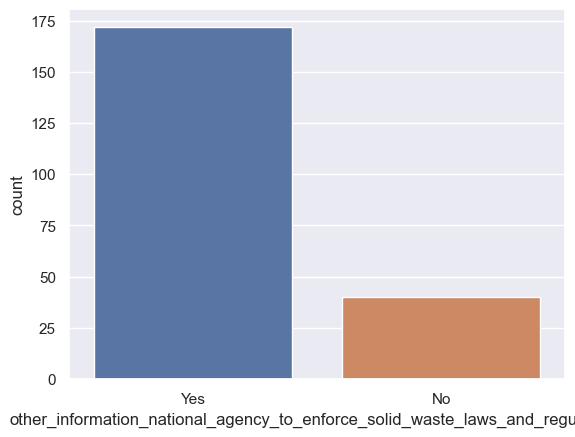

In [72]:
# Count plot for enforcement
sb.countplot(x = final_enforcement['other_information_national_agency_to_enforce_solid_waste_laws_and_regulations'])
plt.show()

From the bar chart above, it seems as if our data is imbalanced. We hence proceeded to check if there is a relationship between enforcement and food organic waste.

In [73]:
# Merging updated food organic waste with enforcement
food_enforcement = pd.merge(updated_food, final_enforcement, how='outer')
food_enforcement = food_enforcement[['composition_food_organic_waste_percent', 'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations']]
food_enforcement

,composition_food_organic_waste_percent,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations
0,51.800000,No
1,51.400000,Yes
2,31.200000,Yes
3,39.000000,Yes
4,38.740000,Yes
...,...,...
207,41.662625,Yes
208,41.941977,Yes
209,44.172371,No
210,41.946838,No


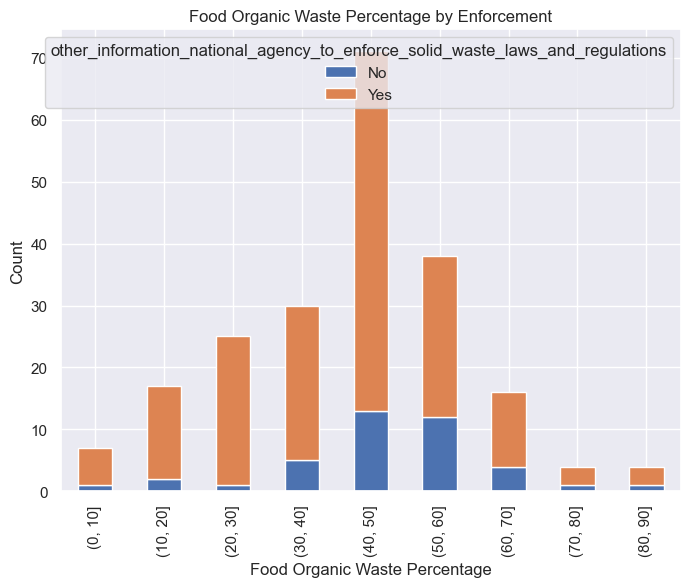

In [74]:
# Create a new column that groups the food organic waste percentage into intervals of 10
food_enforcement['organic_waste_group'] = pd.cut(food_enforcement['composition_food_organic_waste_percent'], range(0, 91, 10))

# Create a pivot table with the count of organic waste percentage in each group for each enforcement value
pivot_table = pd.pivot_table(food_enforcement, values='composition_food_organic_waste_percent', index='organic_waste_group', columns='other_information_national_agency_to_enforce_solid_waste_laws_and_regulations', aggfunc='count')

# Create a stacked bar chart of the pivot table
pivot_table.plot(kind='bar', stacked=True, figsize=(8,6))

# Add labels and titles to the plot
plt.xlabel('Food Organic Waste Percentage')
plt.ylabel('Count')
plt.title('Food Organic Waste Percentage by Enforcement')
plt.show()

In [75]:
# Counting the number of countries for each category (low/high food organic waste & presence/absence of enforcement)
# Making use of the same threshold as national law
low_waste_no_enforcement = food_enforcement[(food_enforcement['composition_food_organic_waste_percent'] <= 50) & (food_enforcement['other_information_national_agency_to_enforce_solid_waste_laws_and_regulations'] == 'No')].shape[0]
low_waste_enforcement = food_enforcement[(food_enforcement['composition_food_organic_waste_percent'] <= 50) & (food_enforcement['other_information_national_agency_to_enforce_solid_waste_laws_and_regulations'] == 'Yes')].shape[0]
high_waste_no_enforcement = food_enforcement[(food_enforcement['composition_food_organic_waste_percent'] > 50) & (food_enforcement['other_information_national_agency_to_enforce_solid_waste_laws_and_regulations'] == 'No')].shape[0]
high_waste_enforcement = food_enforcement[(food_enforcement['composition_food_organic_waste_percent'] > 50) & (food_enforcement['other_information_national_agency_to_enforce_solid_waste_laws_and_regulations'] == 'Yes')].shape[0]

print('Number of countries with low waste and no enforcement: ' + str(low_waste_no_enforcement))
print('Number of countries with low waste and presence of enforcement: ' + str(low_waste_enforcement))
print('Number of countries with high waste and no enforcement: ' + str(high_waste_no_enforcement))
print('Number of countries with high waste and enforcement: ' + str(high_waste_enforcement))

Number of countries with low waste and no enforcement: 22
Number of countries with low waste and presence of enforcement: 128
Number of countries with high waste and no enforcement: 18
Number of countries with high waste and enforcement: 44


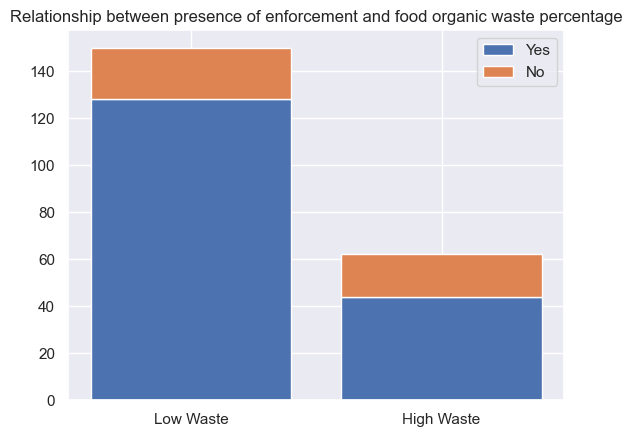

In [76]:
# Plottig a stacked bar chart to check if there is a relationship between the presence of enforcement and organic waste percentage
# [low, high]
yes = [128, 44]
no = [22, 18]

fig, ax = plt.subplots()
x = np.arange(len(yes))
ax.bar(x, yes, label='Yes')
ax.bar(x, no, bottom=yes, label='No')
ax.set_xticks(x)
ax.set_xticklabels(['Low Waste', 'High Waste'])
ax.set_title('Relationship between presence of enforcement and food organic waste percentage')
ax.legend()

From the bar chart above, we can conclude that the presence of enforcement leads to a lower organic waste percentage. We can hence consider the presence of enforcement as a contributing factor to the food organic waste levels. 

## Bi-variate analysis

### GDP vs food organic percentage 

In [77]:
# Extracting country and gdp from excel spreadsheet
gdp = pd.DataFrame(df[['country_name', 'gdp']])

# Dropping the row with India and China as it was previously removed for food organic waste and recycling percentage 
gdp = gdp.drop(gdp[gdp['country_name'] == 'India'].index)
gdp = gdp.drop(gdp[gdp['country_name'] == 'China'].index)

# Extracting country and updated food organic waste
food_organic = pd.DataFrame(updated_food[['country_name', 'composition_food_organic_waste_percent']])

# Merging country, gdp and updated food organic waste  
gdp_foodorganic = pd.merge(gdp, food_organic, how='outer')

# Print the first 5 countries in the data to have an overview
gdp_foodorganic.head()

,country_name,gdp,composition_food_organic_waste_percent
0,Aruba,35563.312500,41.566547
1,Afghanistan,2057.062256,43.681410
2,Angola,8036.690430,51.800000
3,Albania,13724.058590,51.400000
4,Andorra,43711.800780,31.200000


In [78]:
# Extract response and predictors
food_organic_waste = pd.DataFrame(gdp_foodorganic['composition_food_organic_waste_percent'])
GDP = pd.DataFrame(gdp_foodorganic['gdp'])

# Split the dataset into random Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(GDP, food_organic_waste, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (169, 1) (169, 1)
Test Set  : (43, 1) (43, 1)


In [79]:
# Summary statistics for gdp Train
X_train.describe()

,gdp
count,169.000000
mean,23248.192890
std,23446.569301
min,822.610474
25%,5395.613770
50%,13724.058590
75%,35563.312500
max,117335.585900


In [80]:
# Summary statistics for food organic waste Train
y_train.describe()

,composition_food_organic_waste_percent
count,169.000000
mean,41.833964
std,16.213161
min,3.100000
25%,33.820000
50%,41.852355
75%,52.100000
max,87.600000


<Axes: >

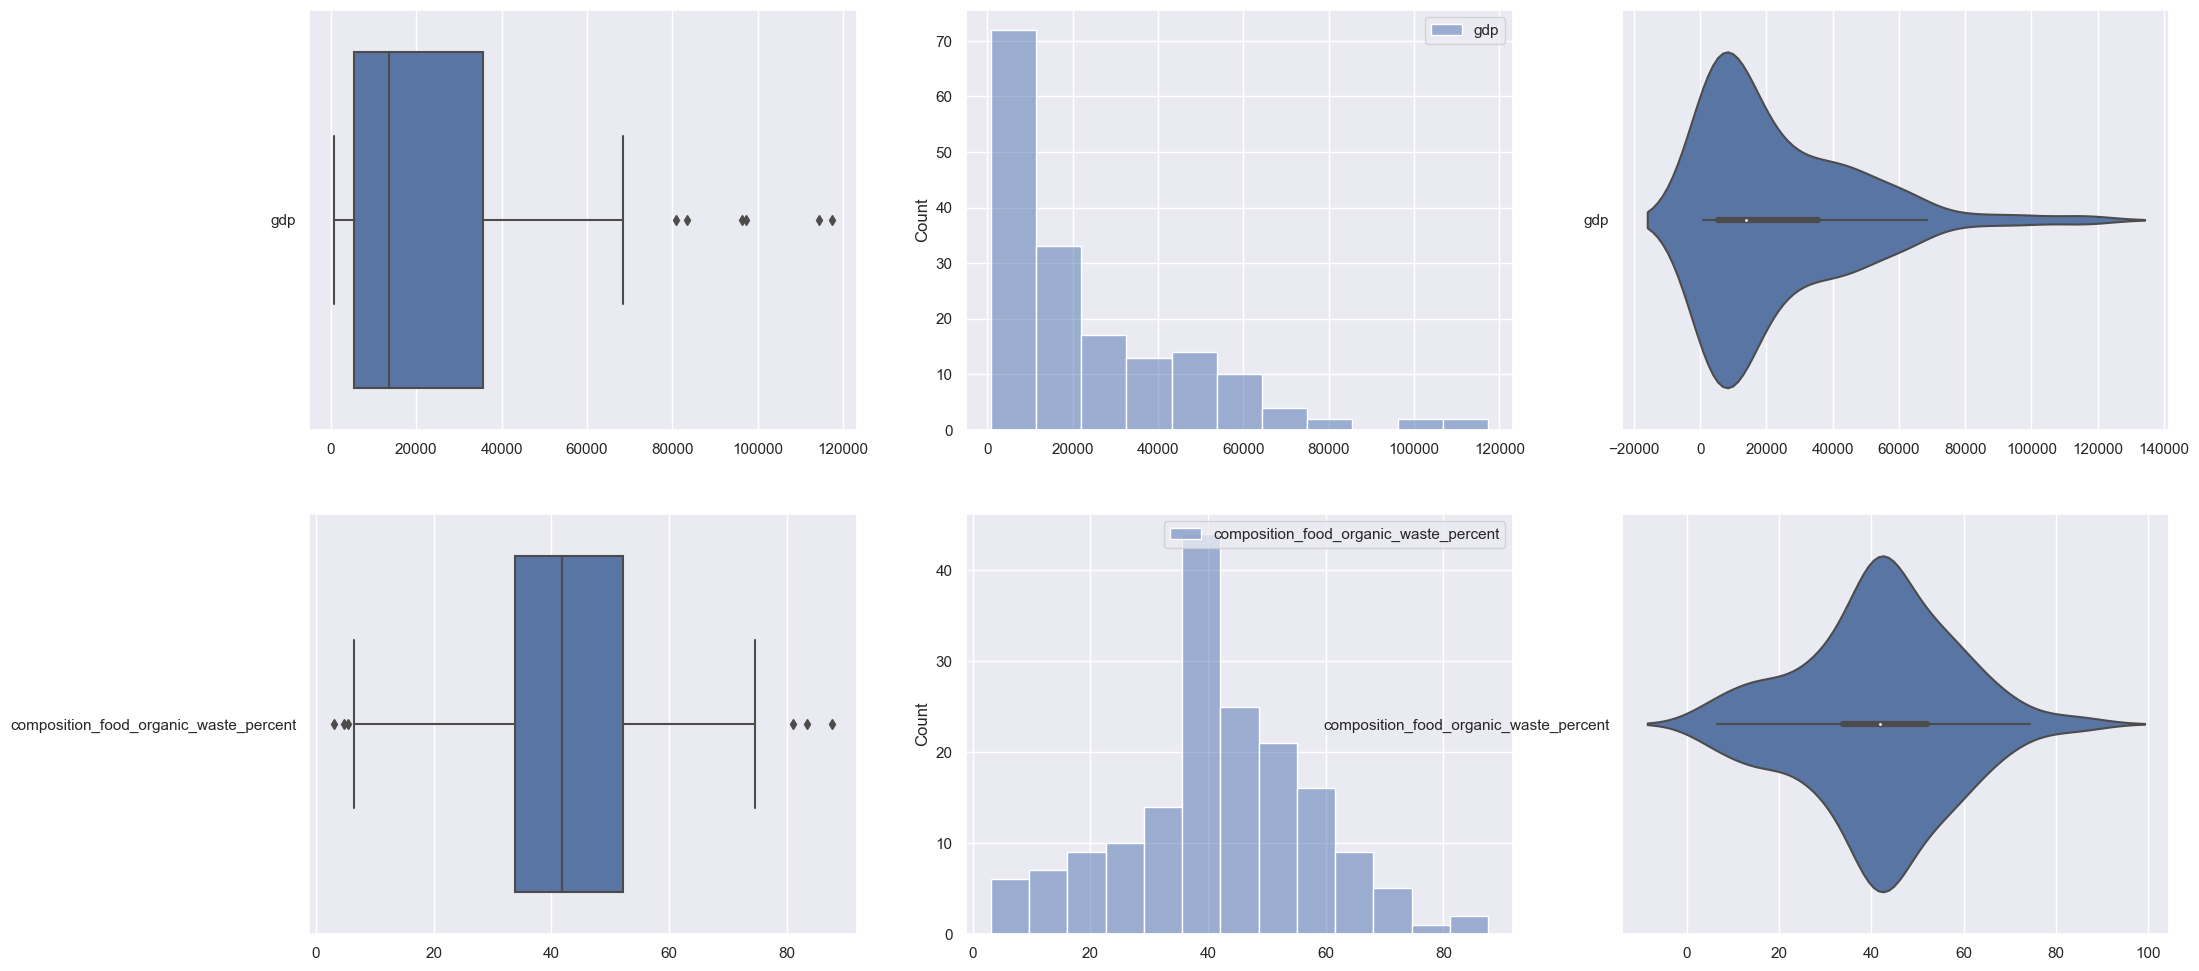

In [81]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for gdp Train
sb.boxplot(data = X_train, orient = "h", ax = axes[0,0])
sb.histplot(data = X_train, ax = axes[0,1])
sb.violinplot(data = X_train, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for food organic waste Train
sb.boxplot(data = y_train, orient = "h", ax = axes[1,0])
sb.histplot(data = y_train, ax = axes[1,1])
sb.violinplot(data = y_train, orient = "h", ax = axes[1,2])

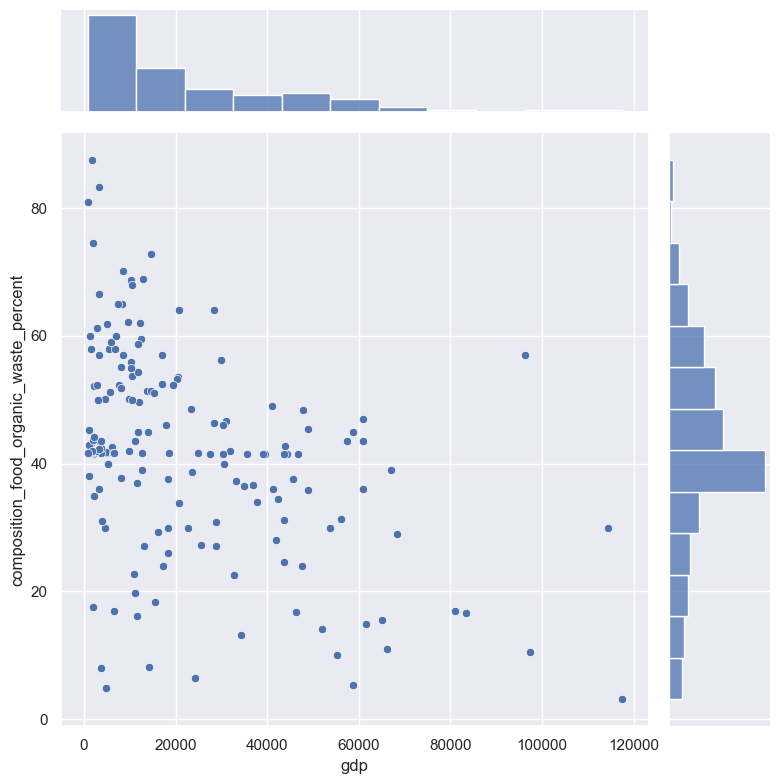

In [82]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)

# Jointplot of food organic waste Train against gdp Train
sb.jointplot(data = trainDF, x = "gdp", y = "composition_food_organic_waste_percent", height = 8)

<Axes: >

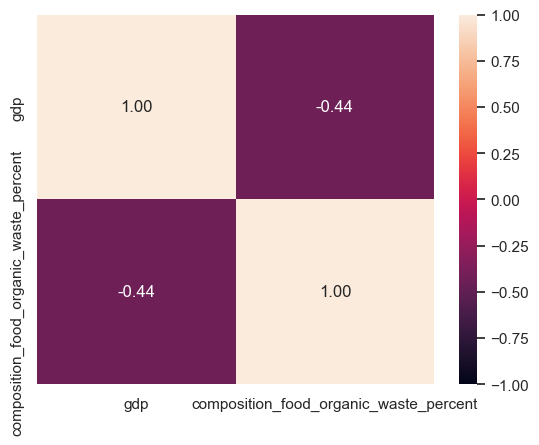

In [83]:
# Calculate the correlation between food organic waste and gdp
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

Intercept of Regression 	: b =  [48.86954425]
Coefficients of Regression 	: a =  [[-0.00030263]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.19153348349044808
Mean Squared Error (MSE) 	: 211.26131768162796
Root Mean Squared Error (RMSE) 	: 14.534831188618186

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.06656492358734556
Mean Squared Error (MSE) 	: 235.95428661784794
Root Mean Squared Error (RMSE) 	: 15.360803579821205



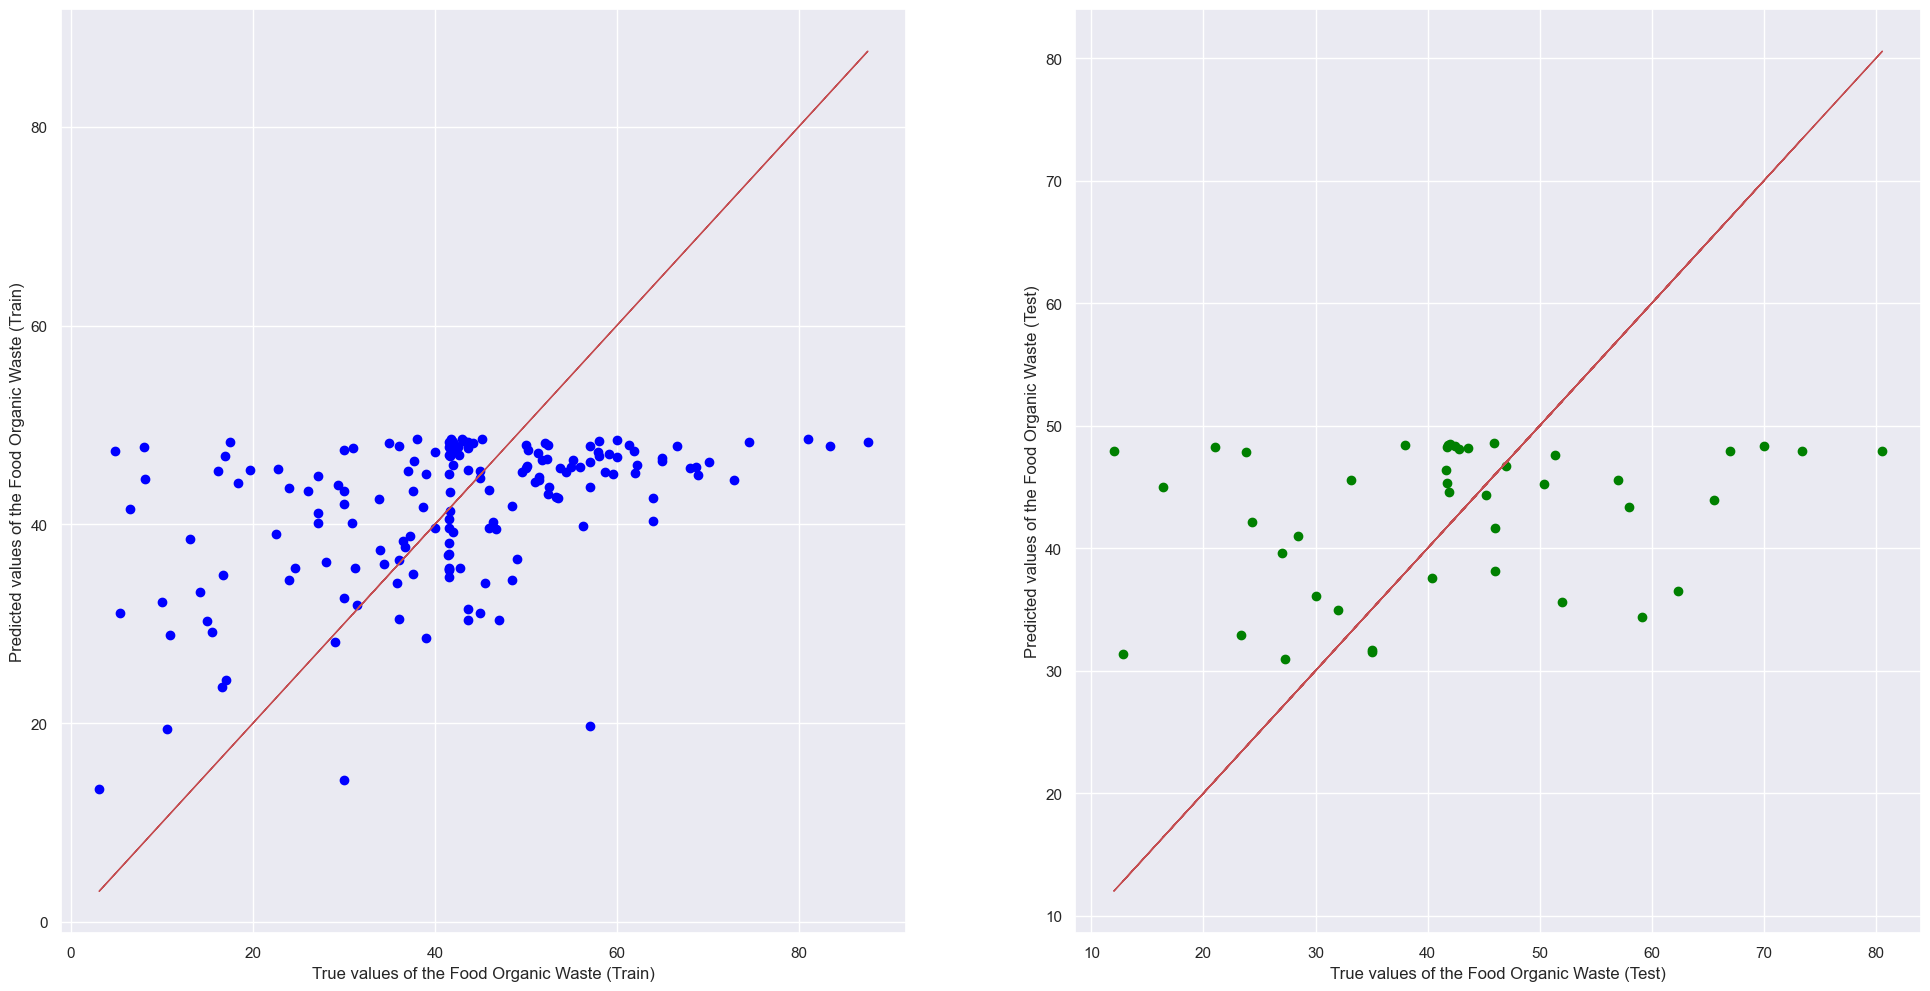

In [84]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict food organic waste values corresponding to gdp
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Food Organic Waste (Train)")
axes[0].set_ylabel("Predicted values of the Food Organic Waste (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Food Organic Waste (Test)")
axes[1].set_ylabel("Predicted values of the Food Organic Waste (Test)")
plt.show()

Since the graphs above for both train and test data have the predicted values of food organic waste capped at about 50, we proceeded to draw a linear regression model between gdp and food organic waste.

Intercept of Regression 	: b =  [48.86954425]
Coefficients of Regression 	: a =  [[-0.00030263]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.19153348349044808
Mean Squared Error (MSE) 	: 1085354825.7827325
Root Mean Squared Error (RMSE) 	: 32944.72379278255

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.06656492358734556
Mean Squared Error (MSE) 	: 768778449.0492756
Root Mean Squared Error (RMSE) 	: 27726.85429415453



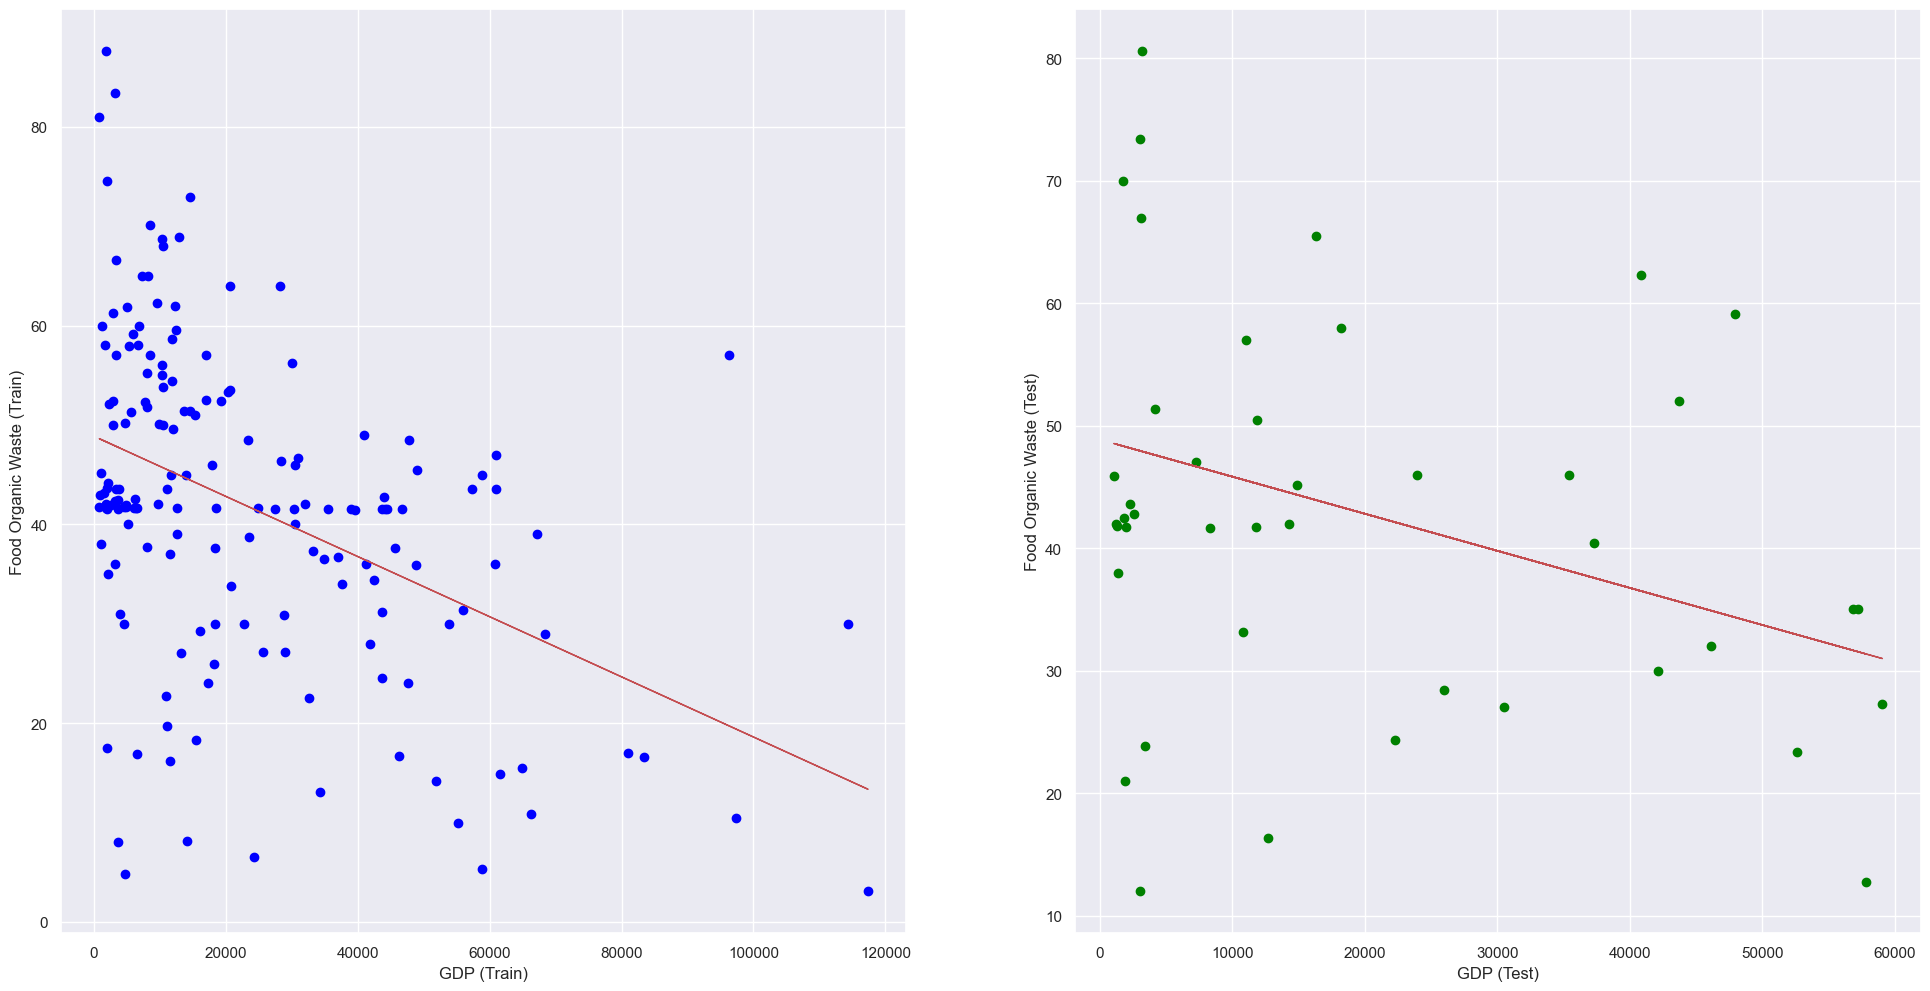

In [85]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict food organic waste values corresponding to gdp
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(X_train, y_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(X_train, y_train)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(X_test, y_test))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(X_test, y_test)))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(X_train, y_train, color = "blue")
axes[0].plot(X_train, y_train_pred, 'r-', linewidth = 1)
axes[0].set_xlabel("GDP (Train)")
axes[0].set_ylabel("Food Organic Waste (Train)")
axes[1].scatter(X_test, y_test, color = "green")
axes[1].plot(X_test, y_test_pred, 'r-', linewidth = 1)
axes[1].set_xlabel("GDP (Test)")
axes[1].set_ylabel("Food Organic Waste (Test)")
plt.show()

We now know why the predicted values for the food organic waste are capped at about 50. This is because the inputs (GDP) near 0  have a large range of outputs (food organic waste) from 0 to 80 plus which makes it difficult to approximate them.
Hence, the inital model seems to make a compromise and maps the inputs near 0 to around 50. 

Since the MSE value is significantly high, this suggests that the model is likely to be inaccurate. Further analysis is hence required to determine how significant is GDP as a variable that affects food organic waste.

### Recycling percentage vs food organic percentage 

In [86]:
# Extracting the updated food organic waste and updated recycling percentage
recyclingpercentage_foodorganic = pd.merge(updated_food,updated_recycle, how='outer')
recyclingpercentage_foodorganic = pd.DataFrame(recyclingpercentage_foodorganic[['country_name', 'composition_food_organic_waste_percent','waste_treatment_recycling_percent']])

# Print the first 5 countries in the data to have an overview
recyclingpercentage_foodorganic.head()

,country_name,composition_food_organic_waste_percent,waste_treatment_recycling_percent
0,Angola,51.80,16.329663
1,Albania,51.40,18.442750
2,Andorra,31.20,18.551296
3,United Arab Emirates,39.00,20.000000
4,Argentina,38.74,6.000000


In [87]:
# Extract response and predictors
food_organic_waste = pd.DataFrame(recyclingpercentage_foodorganic['composition_food_organic_waste_percent'])
recycling_percentage = pd.DataFrame(recyclingpercentage_foodorganic['waste_treatment_recycling_percent'])

# Split the Dataset into random Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(recycling_percentage, food_organic_waste, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (169, 1) (169, 1)
Test Set  : (43, 1) (43, 1)


In [88]:
# Summary statistics for recycling percentage Train
X_train.describe()

,waste_treatment_recycling_percent
count,169.000000
mean,17.598615
std,12.303525
min,0.000970
25%,8.200000
50%,18.129728
75%,18.556223
max,67.000000


In [89]:
# Summary statistics for food organic waste Train
y_train.describe()

,composition_food_organic_waste_percent
count,169.000000
mean,42.555574
std,15.854375
min,3.100000
25%,33.820000
50%,41.795919
75%,51.400000
max,87.600000


<Axes: >

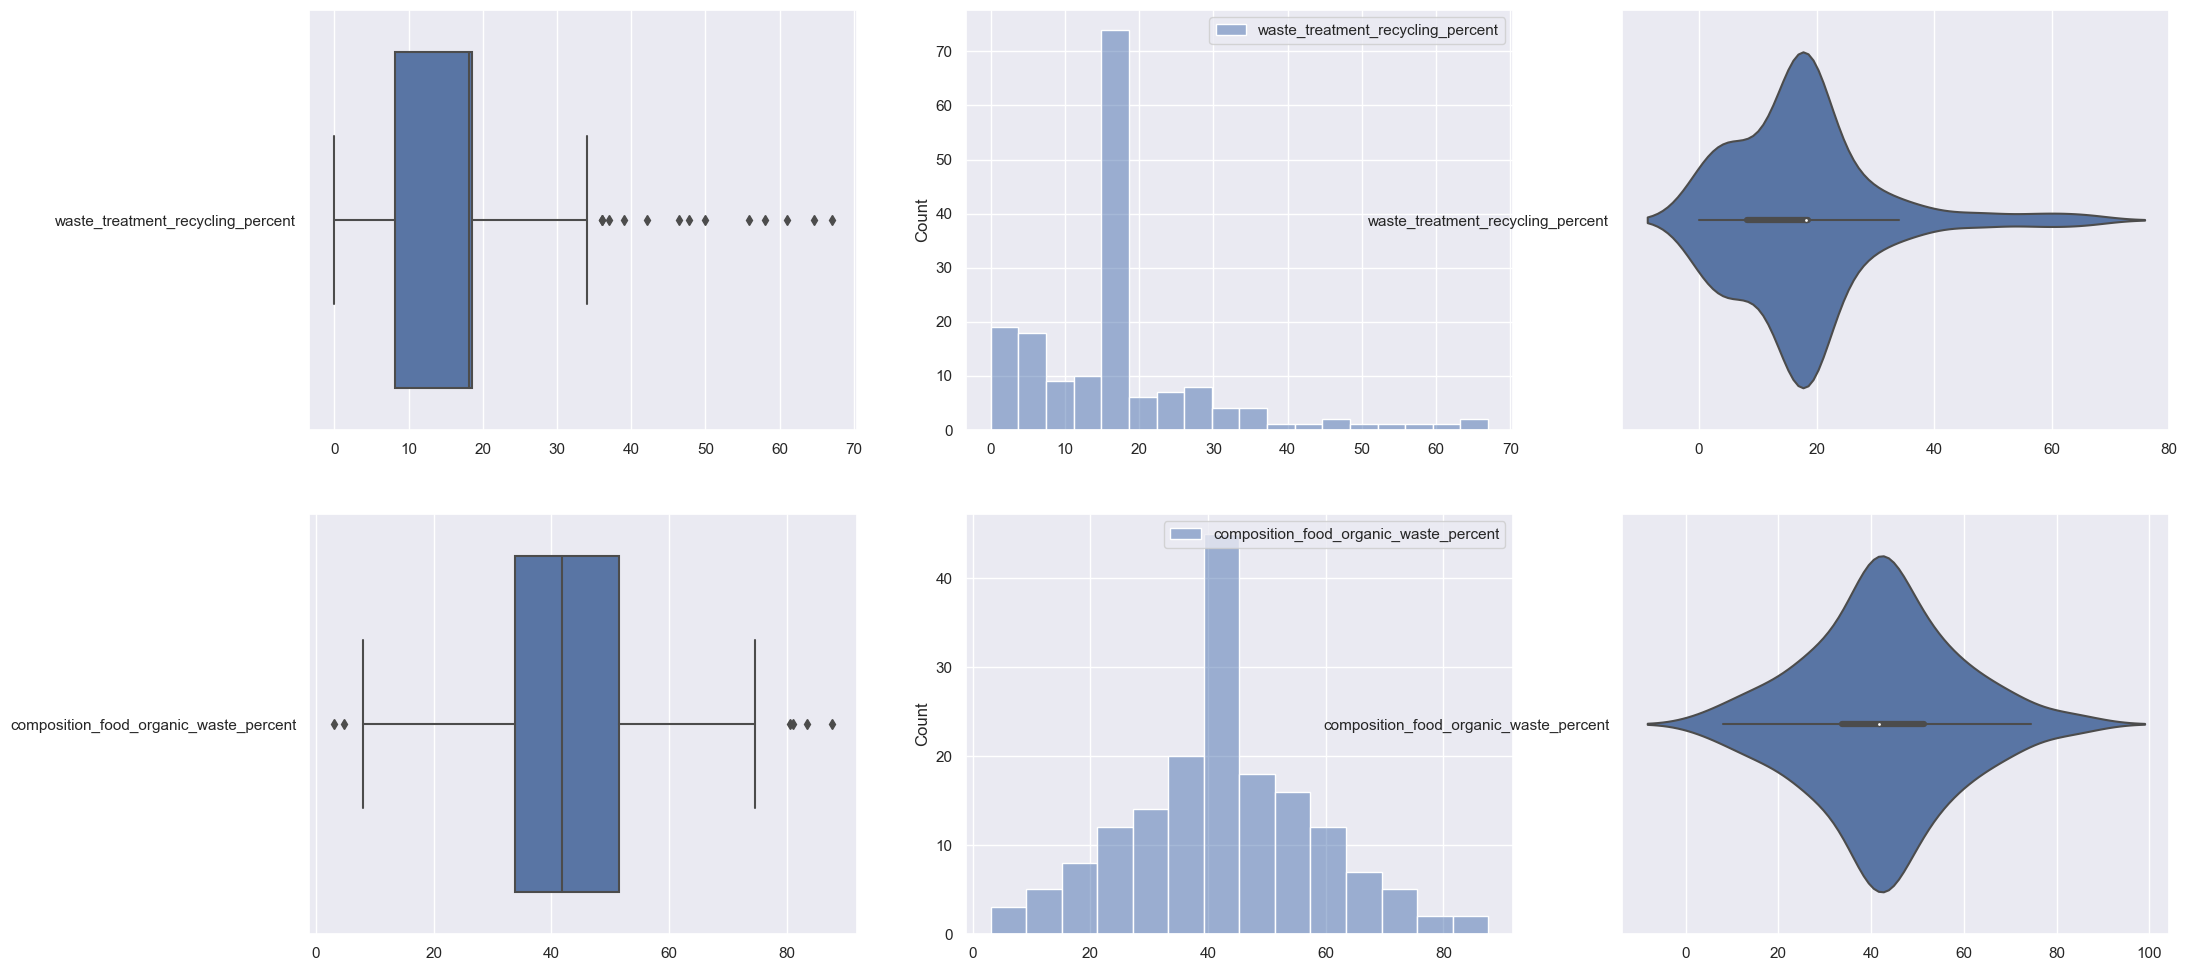

In [90]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for recycling percentage Train
sb.boxplot(data = X_train, orient = "h", ax = axes[0,0])
sb.histplot(data = X_train, ax = axes[0,1])
sb.violinplot(data = X_train, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for food organic waste Train
sb.boxplot(data = y_train, orient = "h", ax = axes[1,0])
sb.histplot(data = y_train, ax = axes[1,1])
sb.violinplot(data = y_train, orient = "h", ax = axes[1,2])

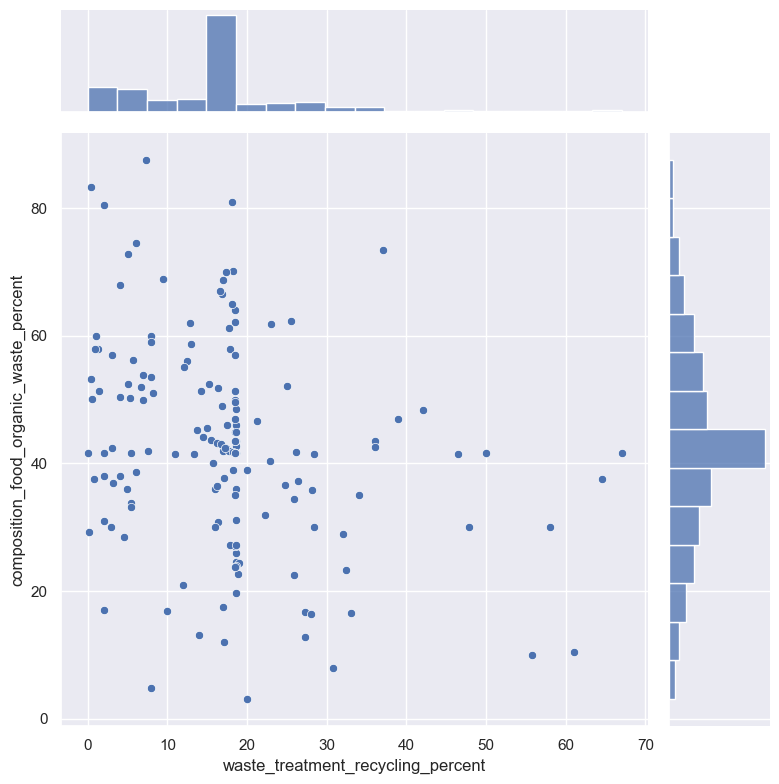

In [91]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)

# Jointplot of food organic waste Train against recycling percentage Train
sb.jointplot(data = trainDF, x = "waste_treatment_recycling_percent", y = "composition_food_organic_waste_percent", height = 8)

<Axes: >

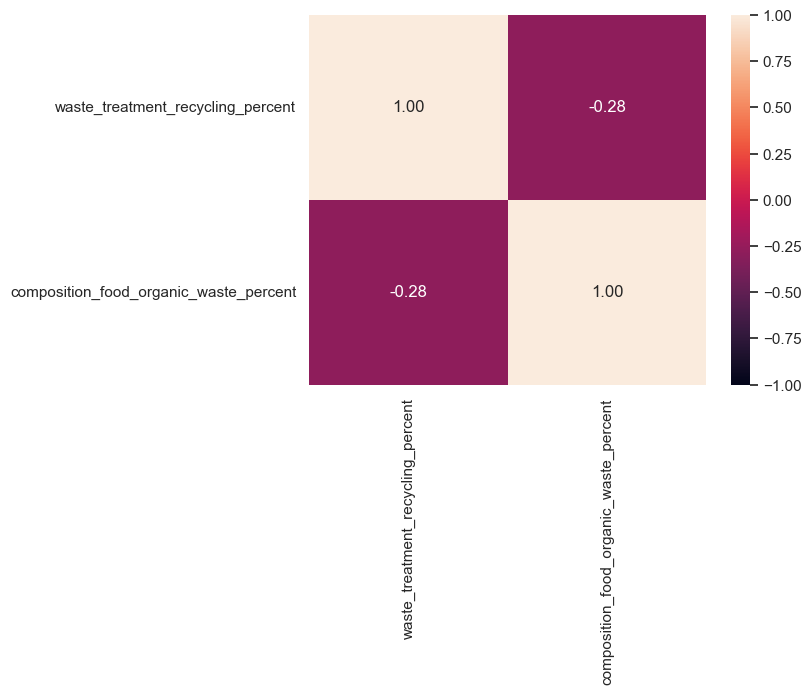

In [92]:
# Calculate the correlation between food organic waste and recycling percentage
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

As GDP constantly has a more negative correlation value than recycling percentage, it seems to suggest that GDP is a more significant numerical factor than recycling percentage in affecting food organic waste.

Intercept of Regression 	: b =  [48.96397872]
Coefficients of Regression 	: a =  [[-0.36414255]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07985530142520991
Mean Squared Error (MSE) 	: 229.9201050126154
Root Mean Squared Error (RMSE) 	: 15.163116599585173

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0996896795492348
Mean Squared Error (MSE) 	: 261.0712243366439
Root Mean Squared Error (RMSE) 	: 16.15769860891841



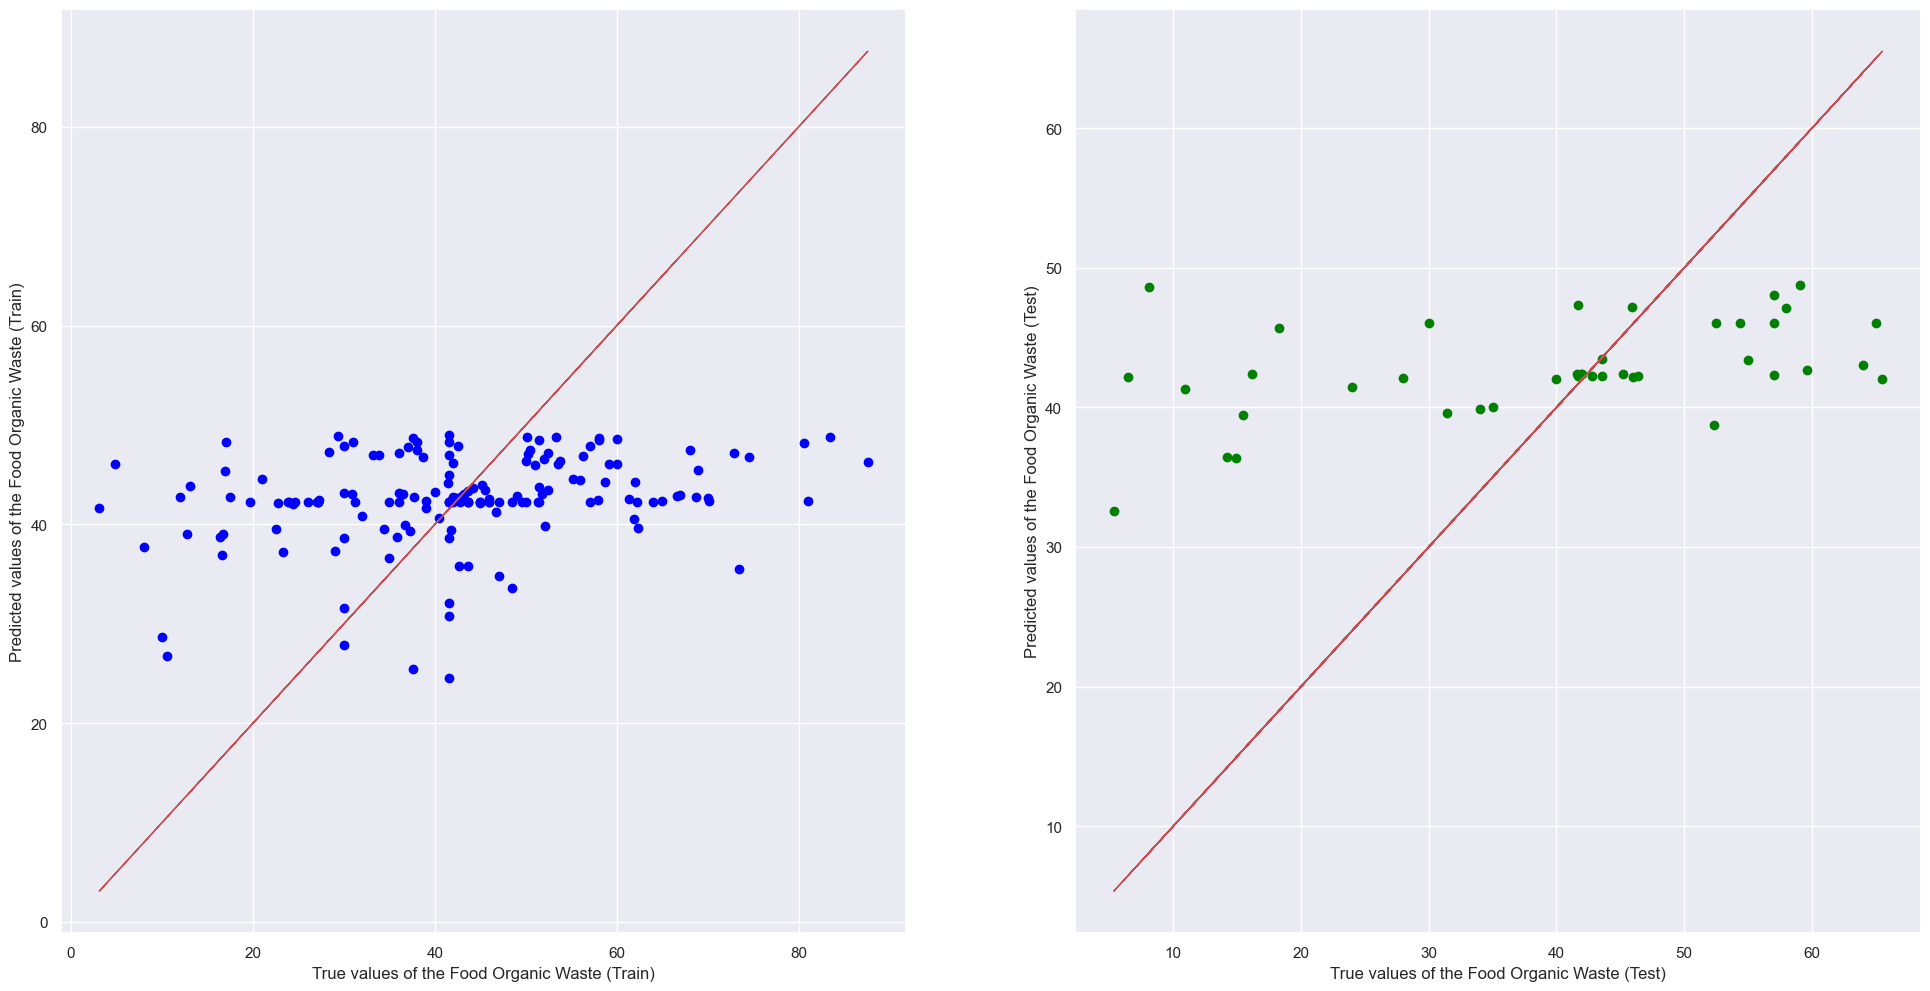

In [93]:
# Linear Regression using Train Data 
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict food organic waste values corresponding to redycling percentage
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Food Organic Waste (Train)")
axes[0].set_ylabel("Predicted values of the Food Organic Waste (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Food Organic Waste (Test)")
axes[1].set_ylabel("Predicted values of the Food Organic Waste (Test)")
plt.show()

Since the graphs above for both train and test data have the predicted values of food organic waste capped at about 50, we proceeded to draw a linear regression model between recycling percentage and food organic waste.

Intercept of Regression 	: b =  [48.96397872]
Coefficients of Regression 	: a =  [[-0.36414255]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07985530142520991
Mean Squared Error (MSE) 	: 1132.7977295627802
Root Mean Squared Error (RMSE) 	: 33.65706061976863

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0996896795492348
Mean Squared Error (MSE) 	: 1017.3884545292902
Root Mean Squared Error (RMSE) 	: 31.896527311437687



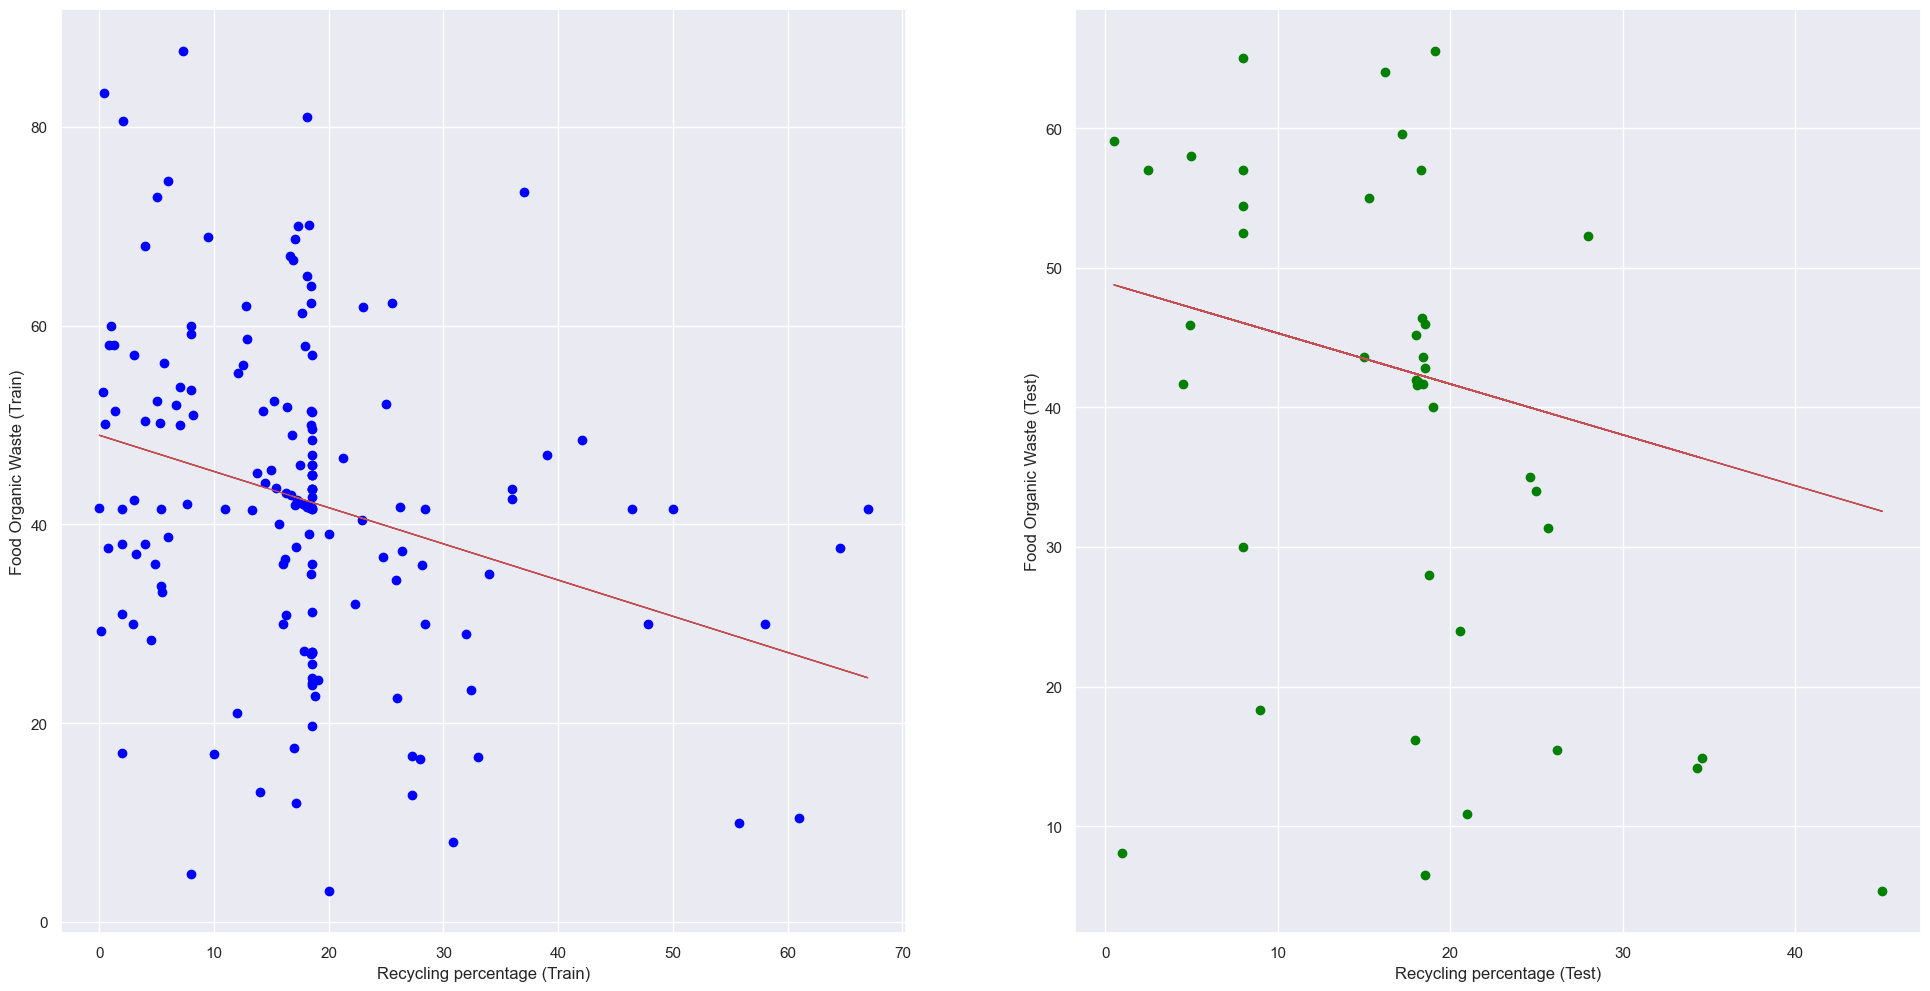

In [94]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict food organic waste values corresponding to recycling percentage
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(X_train, y_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(X_train, y_train)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(X_test, y_test))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(X_test, y_test)))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(X_train, y_train, color = "blue")
axes[0].plot(X_train, y_train_pred, 'r-', linewidth = 1)
axes[0].set_xlabel("Recycling percentage (Train)")
axes[0].set_ylabel("Food Organic Waste (Train)")
axes[1].scatter(X_test, y_test, color = "green")
axes[1].plot(X_test, y_test_pred, 'r-', linewidth = 1)
axes[1].set_xlabel("Recycling percentage (Test)")
axes[1].set_ylabel("Food Organic Waste (Test)")
plt.show()

We now know why the predicted values for the food organic waste are capped at about 50. This is because the inputs (recycling percentage) near 0  have a large range of outputs (food organic waste) from 0 to 80 plus which makes it difficult to approximate them. Hence, the initial model seems to make a compromise and maps the inputs near 0 to around 50. 

Although the MSE value for this model is much less than that of GDP, the MSE value is still relatively high. This suggests that the model is likely to be inaccurate. Further analysis is hence required to determine how significant is recycling percentage as a variable that affects food organic waste.

### Presence of national law vs food organic percentage

In [95]:
# Extracting the updated food organic waste and updated national law
nationallaw_foodorganic = pd.merge(updated_food,final_national_law, how='outer')
nationallaw_foodorganic = pd.DataFrame(nationallaw_foodorganic[['composition_food_organic_waste_percent','other_information_national_law_governing_solid_waste_management_in_the_country']])
nationallaw_foodorganic

,composition_food_organic_waste_percent,other_information_national_law_governing_solid_waste_management_in_the_country
0,51.800000,Yes
1,51.400000,Yes
2,31.200000,Yes
3,39.000000,Yes
4,38.740000,Yes
...,...,...
207,41.662625,Yes
208,41.941977,Yes
209,44.172371,Yes
210,41.946838,Yes


<Axes: xlabel='other_information_national_law_governing_solid_waste_management_in_the_country', ylabel='composition_food_organic_waste_percent'>

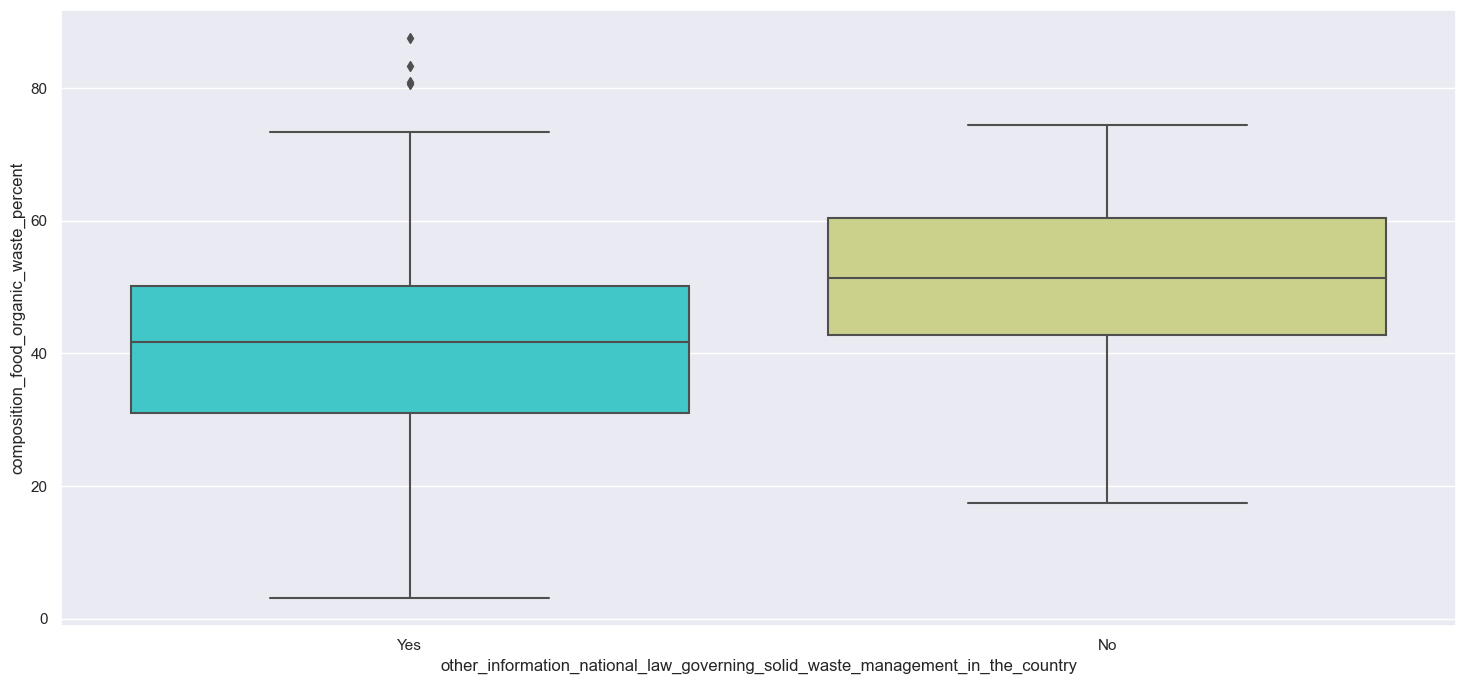

In [96]:
# Boxplot of national law and food organic waste
f = plt.figure(figsize=(18, 8))
sb.boxplot(x='other_information_national_law_governing_solid_waste_management_in_the_country',y='composition_food_organic_waste_percent',data = nationallaw_foodorganic, palette='rainbow')

### Enforcement of laws vs food organic percentage

In [97]:
# Extracting the updated food organic waste and updated enforcement
enforcement_foodorganic = pd.merge(updated_food,final_enforcement, how='outer')
enforcement_foodorganic = pd.DataFrame(enforcement_foodorganic[['composition_food_organic_waste_percent','other_information_national_agency_to_enforce_solid_waste_laws_and_regulations']])
enforcement_foodorganic

,composition_food_organic_waste_percent,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations
0,51.800000,No
1,51.400000,Yes
2,31.200000,Yes
3,39.000000,Yes
4,38.740000,Yes
...,...,...
207,41.662625,Yes
208,41.941977,Yes
209,44.172371,No
210,41.946838,No


<Axes: xlabel='other_information_national_agency_to_enforce_solid_waste_laws_and_regulations', ylabel='composition_food_organic_waste_percent'>

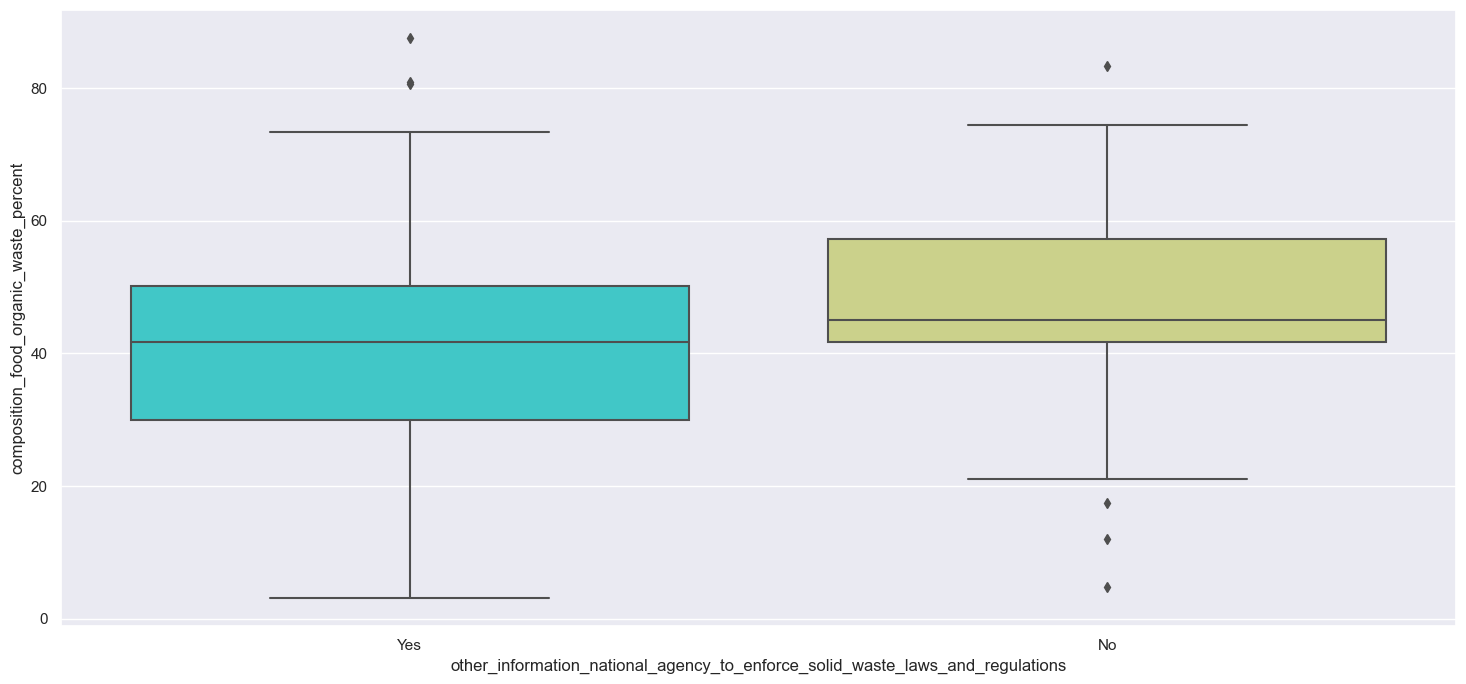

In [98]:
# Boxplot of enforcement and organic waste
f = plt.figure(figsize=(18, 8))
sb.boxplot(x='other_information_national_agency_to_enforce_solid_waste_laws_and_regulations', y='composition_food_organic_waste_percent', data = enforcement_foodorganic, palette='rainbow', order = ['Yes', 'No'])

From the box-plots of food organic waste against national law and enforcement, it is hard for us to determine if national law or enforcement is a more significant categorical variable that affected the percentage of food organic waste. We hence proceeded to conduct further analysis.

# Multivariate analysis

In [99]:
# Merging the numercial variables (gdp and updated recycling percentage) together along with updated food organic waste
updated_numerical = pd.merge(updated_food, updated_recycle, how='outer')
updated_numerical = pd.merge(updated_numerical, gdp, how='outer')
updated_numerical = pd.DataFrame(updated_numerical[['country_name', 'composition_food_organic_waste_percent', 'gdp', 'waste_treatment_recycling_percent']])
updated_numerical

,country_name,composition_food_organic_waste_percent,gdp,waste_treatment_recycling_percent
0,Angola,51.800000,8036.690430,16.329663
1,Albania,51.400000,13724.058590,18.442750
2,Andorra,31.200000,43711.800780,18.551296
3,United Arab Emirates,39.000000,67119.132810,20.000000
4,Argentina,38.740000,23550.099610,6.000000
...,...,...,...,...
207,Eswatini,41.662625,8321.106445,18.431056
208,Tajikistan,41.941977,2616.475586,17.925565
209,Tanzania,44.172371,2128.553955,14.450701
210,"Venezuela, RB",41.946838,14269.673830,17.030021


In [100]:
# Merging the categorical variables (updated national law and updated enforcement) together along with updated food organic waste
updated_categorical = pd.merge(final_national_law, final_enforcement, how='outer')
updated_categorical = pd.merge(updated_categorical, updated_food, how='outer')
updated_categorical = pd.DataFrame(updated_categorical[['country_name', 'composition_food_organic_waste_percent', 'other_information_national_law_governing_solid_waste_management_in_the_country', 'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations']])
updated_categorical

,country_name,composition_food_organic_waste_percent,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations
0,Aruba,41.566547,Yes,Yes
1,Afghanistan,43.681410,Yes,Yes
2,Angola,51.800000,Yes,No
3,Albania,51.400000,Yes,Yes
4,Andorra,31.200000,Yes,Yes
...,...,...,...,...
207,South Sudan,42.004510,Yes,No
208,São Tomé and Príncipe,41.594452,Yes,Yes
209,Eswatini,41.662625,Yes,Yes
210,Chad,70.000000,No,No


In [101]:
# Merging the numerical and categorical variables together along with updated food organic waste
updated_numerical_categorical = pd.merge(updated_numerical, updated_categorical, how='outer')
updated_numerical_categorical

,country_name,composition_food_organic_waste_percent,gdp,waste_treatment_recycling_percent,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations
0,Angola,51.800000,8036.690430,16.329663,Yes,No
1,Albania,51.400000,13724.058590,18.442750,Yes,Yes
2,Andorra,31.200000,43711.800780,18.551296,Yes,Yes
3,United Arab Emirates,39.000000,67119.132810,20.000000,Yes,Yes
4,Argentina,38.740000,23550.099610,6.000000,Yes,Yes
...,...,...,...,...,...,...
207,Eswatini,41.662625,8321.106445,18.431056,Yes,Yes
208,Tajikistan,41.941977,2616.475586,17.925565,Yes,Yes
209,Tanzania,44.172371,2128.553955,14.450701,Yes,No
210,"Venezuela, RB",41.946838,14269.673830,17.030021,Yes,No


In [102]:
# Create a list of independent variables
X = updated_numerical[['gdp', 'waste_treatment_recycling_percent']]

# Add a constant to the list of independent variables
X = sm.add_constant(X)

# Define the dependent variable
Y = updated_numerical['composition_food_organic_waste_percent']

# Create and fit the multiple regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())

                                      OLS Regression Results                                      
Dep. Variable:     composition_food_organic_waste_percent   R-squared:                       0.188
Model:                                                OLS   Adj. R-squared:                  0.180
Method:                                     Least Squares   F-statistic:                     24.21
Date:                                    Fri, 21 Apr 2023   Prob (F-statistic):           3.51e-10
Time:                                            23:45:34   Log-Likelihood:                -868.00
No. Observations:                                     212   AIC:                             1742.
Df Residuals:                                         209   BIC:                             1752.
Df Model:                                               2                                         
Covariance Type:                                nonrobust                                         
          

A F-value is the ratio of two variances. A p-value is the probability of obtaining the results of a null hypothesis, which we are assuming is correct. The higher the F-value and the lower the p-value means that we can reject our null hypothesis of a predictor variable being insignificant to the response variable.

The value of the F-statistics is 24.21, which is a high value and suggests that the model of gdp and recycling percentage are variables that largely influence the levels of food organic waste. The p-value of gdp is lower than both 0.05 and the recycling percentage, which suggests that it is of a higher significance to food organic waste than the recycling percentage. The coefficients of gdp and recycling percentage are both negative, which suggests that they have an inverse relationship with food organic waste. As gdp and recycling percentage are higher, food organic waste is lower.

In [103]:
# Load data into a pandas dataframe
df = updated_numerical_categorical

# Split the data into training and test sets
X = df[['gdp', 'waste_treatment_recycling_percent', 'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations', 'other_information_national_law_governing_solid_waste_management_in_the_country']]
y = df['composition_food_organic_waste_percent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical variables to dummy variables
X_train = pd.get_dummies(X_train, columns=['other_information_national_agency_to_enforce_solid_waste_laws_and_regulations', 'other_information_national_law_governing_solid_waste_management_in_the_country'])
X_test = pd.get_dummies(X_test, columns=['other_information_national_agency_to_enforce_solid_waste_laws_and_regulations', 'other_information_national_law_governing_solid_waste_management_in_the_country'])

# Initialize the random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the random forest regressor to the training data
rf.fit(X_train, y_train)

# Predict the dependent variable values for the test data
y_pred = rf.predict(X_test)

# Calculate the performance metrics for the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r_squared}')

# Print the feature importance scores
importances = rf.feature_importances_
print(f'Feature Importances: {importances}')

# Create a list of the names of the dependent variables
dep_vars = ['gdp', 'waste_treatment_recycling_percent',
            'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations', 
            'other_information_national_law_governing_solid_waste_management_in_the_country']

importances = list(rf.feature_importances_)
num_imp = importances[:2]  # Importance scores for numerical features (gdp, waste_treatment_recycling_percent)
cat_imp = importances[2:]  # Importance scores for categorical features (other_information_national_agency_to_enforce_solid_waste_laws_and_regulations, other_information_national_law_governing_solid_waste_management_in_the_country)

print(f'Numerical Feature Importances: {num_imp}')
print(f'Categorical Feature Importances: {cat_imp}')

Mean Squared Error: 320.38797323073356
Root Mean Squared Error: 17.899384716540776
R-squared: 0.0015152633892142608
Feature Importances: [0.51124589 0.44212771 0.0106589  0.01047784 0.01292513 0.01256453]
Numerical Feature Importances: [0.5112458853623425, 0.44212770983609107]
Categorical Feature Importances: [0.010658902089409396, 0.010477840657332536, 0.012925129666679087, 0.012564532388145335]


As shown above, the categorical feature importances of the enforcement and national law is approximately equal (around 0.010). The last 2 values are dummy variables due to the conversion of categorical variables into numerical variables to be used in randomforest, and hence can be ignored. Therefore, we have decided to conduct further analysis to determine which categorical feature is more significant.

In [104]:
data = updated_categorical

# perform two-way ANOVA
model = ols('composition_food_organic_waste_percent ~ other_information_national_agency_to_enforce_solid_waste_laws_and_regulations * other_information_national_law_governing_solid_waste_management_in_the_country', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# print ANOVA table
print(anova_table)

                                                          sum_sq     df  \
other_information_national_agency_to_enforce_so...    597.655588    1.0   
other_information_national_law_governing_solid_...   1246.859067    1.0   
other_information_national_agency_to_enforce_so...      4.889152    1.0   
Residual                                            52300.005901  208.0   

                                                           F    PR(>F)  
other_information_national_agency_to_enforce_so...  2.376909  0.124661  
other_information_national_law_governing_solid_...  4.958827  0.027030  
other_information_national_agency_to_enforce_so...  0.019444  0.889235  
Residual                                                 NaN       NaN  


We can tell that the first variable is enforcement while the second variable is national law. The last variable relates enforcement and national law together. The F-value is higher and the p-value is lower for national law compared to enforcement. This suggests that national law has a more significant effect on the response variable, food organic waste percentage, as compared to enforcement. 

From the above analysis, we have concluded that GDP is the most significant numerical variable while national law is the most significant categorical variable. All in all, GDP is the most significant variable that affects food organic waste as it has the highest feature importance value of 0.511. 

# Conclusion & Insights

In conclusion, GDP has the most significant impact on food organic waste percentage. The higher the GDP, the lower the food organic waste percentage, showing an inverse relationship between them. 

To tackle this, we suggest increasing GDP to reduce food organic waste. One way to do this is for governments to boost the economy by investing in Research and Development (R&D) sectors. They can do so by developing longer lasting or non-perishable food, which will allow for more people to keep safe, edible food for a longer period of time. This therefore decreases the amount of food that expires quickly and has to be discarded, slowing down food wastage speeds. This investment in R&D also encourages people to be more aware of high food wastage levels and increase GDP as investment and government spending are both components of GDP. 

Besides focusing on GDP, we must acknowledge that every small action counts. Hence, we should start from single individuals who are willing to help decrease food wastage levels. 

We can do so through educational and awareness campaigns about reducing food wastage. Food is a necessity and a luxury. Fees can be imposed on unfinished, unpacked food. Unfinished or unsold food items can also be distributed to less fortunate communities. 

Such campaigns can also push for recycling convenience, such as food compost bins. For people who lack the time to recycle food, this will aid them in contributing to healthy recycling habits, which will speed up the rates of food recycling. 

All in all, food wastage does not receive enough attention and urgency. We should hence give it as much importance as plastic and paper recycling as it will allow for a cleaner, greener earth for us to live in.